# Health Dataset Cirhosis - 1A

### Datasets Information

### Goals:
1. [LO 1,2,3 – 15 Points] Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key  findings and anomalies existing in the dataset. Make sure to handle the anomalies accordingly! 
2. [LO 1,2,3 – 5 Points] Train a Random Forest and an XGBoost model, fine-tune at least 3 of their  hyperparameters with at least 3 search space and evaluate the models on an independent test set! 
3. [LO 1,2,3,4 – 10 Points] Analyze the evaluation results based on at least 3 evaluation metrics and make  a conclusion! 
4. [LO 1,2,3,4 – 5 Points] From the best model, analyze which features can be considered important to  predict the outputs! 
5. [LO 4 – 5 Points] Make a presentation video explaining the key points of your analysis (max. 5  minutes)! 


### Variables

1. **ID**: the individual’s patient ID 
2. **Registration Date**: the individual’s registration date at the hospital 
3. **Drug**: type of drug given to the individual (D-penicillamine or placebo) 
4. **Birth Date**: the birth date of the individual 
5. **Gender**: the gender of the individual 
6. **Ascites**: presence of ascites (Y/N) 
7. **Hepatomegaly**: presence of hepatomegaly (Y/N) 
8. **Edema**: presence of edema (N = no edema, S = edema without diuretics, Y = edema despite diuretic  therapy) 
9. **Bilirubin**: serum bilirubin (mg/dL) 
10. **Cholesterol**: serum cholesterol (mg/dL) 
11. **Albumin**: amount of albumin (g/dL) 
12. **Copper**: amount of copper found in urine (μg/day) 
13. **Alkaline Phospatase (U/L)**: alkaline phosphatase (U/L) 
14. **SGOT**: Serum Glutamic-Oxaloacetic Transaminase (U/mL) 
15. **Tryglicerides**: Amount of triglycerides (mg/dL) 
16. **Platelets**: Platelets per cubic (mL/1000) 
17. **Prothrombin**: Prothrombin time (s) 
18. **Stage**: Histologic stage of the cirrhosis 


### Step 1 : importing library and datasets

In [4]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as gro
from plotly.subplots import make_subplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random 

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder,OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Training Models
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL

# Evaluation
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,recall_score,roc_curve, auc

In [5]:
datasets = pd.read_csv("/Users/aaron/Documents/Semester 3/UAS/ML/1A.tsv",sep='\t')
datasets

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,2023/01/30,NaN,1957/12/11,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,415,2021/12/04,NaN,1985/12/11,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,416,2022/01/21,NaN,1967/12/12,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,417,2023/01/20,NaN,1966/12/11,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3


### Step 2 : EDA

**a. see the unique value and data type of each columns**

In [6]:
for column in datasets.columns:
    unique_values = datasets[column].nunique()
    print(f"{column}: {unique_values}")

ID: 418
Registration Date: 399
Drug: 5
Birth Date: 344
Gender: 2
Ascites: 2
Hepatomegaly: 2
Edema: 3
Bilirubin: 98
Cholesterol: 69
Albumin: 154
Copper: 158
Alkaline Phospatase (U/L): 295
SGOT: 179
Tryglicerides: 147
Platelets: 243
Prothrombin: 48
Stage: 4


In [8]:
print(datasets.dtypes)

ID                             int64
Registration Date             object
Drug                          object
Birth Date                    object
Gender                        object
Ascites                       object
Hepatomegaly                  object
Edema                         object
Bilirubin                    float64
Cholesterol                  float64
Albumin                      float64
Copper                       float64
Alkaline Phospatase (U/L)    float64
SGOT                         float64
Tryglicerides                float64
Platelets                    float64
Prothrombin                  float64
Stage                         object
dtype: object


From the information above, let's see what we can infer for each column:

1. ID: For the ID column, we’ll remove it straight away because it’s a unique identifier variable that has no relationship or connection to the target variable (Y).
2. Registration Date: For this, I’ve decided to categorize the data so that it can be processed more easily by the machine later. I’ll categorize it into 3 segments: '2015 and earlier', '2016-2020', and '2021-now'. This way, it will be easier for the machine to recognize whether time indicators affect the stage of Cirrhosis.
3. Drug: For the drug column, we will use it, but the confusion arises because there are only 2 unique values, which are penicillin and placebo. However, the unique value count shows 5. Even when including null, it still doesn't reach 5, so we’ll check that later.
4. Birth Date: We’ll convert this to a numerical value, which is age, as it will be more useful and easier to analyze later.
5. Gender: Overall, the unique values seem fine, indicating there are no null values.
6. Ascites: Overall, the unique values seem fine, indicating there are no null values.
Hepatomegaly: Overall, the unique values seem fine, indicating there are no null values.
7. Edema: Overall, the unique values seem fine, indicating there are no null values.
8. Bilirubin: Bilirubin is also a float, and we’ll look into it further because, when checking the head of the data, we see imbalances (some bilirubin values are significantly higher than others).
9. Cholesterol: From a quick glance at the dataset, it seems that cholesterol has many null values, so we’ll look into it later.
10. Albumin: Overall, it seems fine, but we need to check for nulls and duplicates.
11. Copper: Similar to albumin, it seems fine, but we need to check for nulls and duplicates.
12. Alkaline Phosphatase: It seems fine, but we need to check for nulls and duplicates.
13. SGOT: Overall, it seems fine, but we need to check for nulls and duplicates.
14. Triglycerides: Overall, it seems fine, but we need to check for nulls and duplicates.
15. Platelets: Overall, it seems fine, but we need to check for nulls and duplicates.
16. Prothrombin: Overall, it seems fine, but we need to check for nulls and duplicates.

**b. dropping duplicates ( if there are any)**

In [5]:
datasets.duplicated().sum()

0

secara duplicates aman jadi tidak ada data yang double sehingga aman banget nih untuk kita lanjut ke NULL
no duplicates indicates that there's not gonna be a mainstream insight that we gonna get from each data rows.

**c. dropping unuseful column**

In [9]:
# drop kolom id 
datasets.drop(["ID"], axis="columns", inplace=True)
datasets

,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2023/01/30,NaN,1957/12/11,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,2021/12/04,NaN,1985/12/11,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,2022/01/21,NaN,1967/12/12,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,2023/01/20,NaN,1966/12/11,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3


**d. stage and drug column problem (make narkoba makanya bermasalah ini mah pak)**

In [10]:
unique_values = datasets['Stage'].unique()
for value in unique_values:
    print(value)

Stage4
stage_3
Stage 2
Stage 1
nan


In [11]:
unique_values = datasets['Drug'].unique()
for value in unique_values:
    print(value)

D-penicillamine
Placebo
placebo
lacebo
d-penicillamine
nan


ternyata ada orang yang typo dan sepertinya biasa capital problem

In [12]:
datasets['Drug'] = datasets['Drug'].replace({'d-penicillamine': 'D-penicillamine',  'Placebo': 'placebo','lacebo': 'placebo'})
unique_values = datasets['Drug'].unique()
for value in unique_values:
    print(value)

D-penicillamine
placebo
nan


In [13]:
datasets['Stage'] = datasets['Stage'].replace({'stage_3': 'Stage 3', 'Stage4': 'Stage 4'})
unique_values = datasets['Stage'].unique()
for value in unique_values:
    print(value)

Stage 4
Stage 3
Stage 2
Stage 1
nan


sekarang tinggal masalah null untuk EDA

**e. handling missing values**

In [14]:
# Check NA dan Percentage
datasets.isna().sum()
percentage_na = datasets.isna().sum()/len(datasets)
print(percentage_na*100)

Registration Date             0.000000
Drug                         25.358852
Birth Date                    0.000000
Gender                        0.000000
Ascites                      25.358852
Hepatomegaly                 25.358852
Edema                         0.000000
Bilirubin                     0.000000
Cholesterol                  80.861244
Albumin                       0.000000
Copper                       25.837321
Alkaline Phospatase (U/L)    25.358852
SGOT                         25.358852
Tryglicerides                 0.000000
Platelets                     2.631579
Prothrombin                   0.478469
Stage                         1.435407
dtype: float64


There are some percentages that I categorized as follows:
- Below 5%: We will drop the data because the percentage is very small.
- 5% - 50%: I will replace the null or NaN values with the median. Why not the average? Because I want to avoid outliers that may arise and aim for a distribution that is centered around the middle value. Why not just drop it? Dropping such a large amount of data would significantly affect the insights we can gather. Yes, by replacing it, we are losing some insights, but if we drop it, we would lose data from other columns as well, which would be wasteful. So, the best option is to replace it. For categorical data, I will replace it with the mode.
- Above 50%: This column is beyond saving, so we’ll just drop it.

In [15]:
def handle_missing_data(df):
    for column in df.columns:
        missing_percentage = df[column].isnull().mean() * 100 
        print(f"Processing column '{column}' with {missing_percentage:.2f}% missing values")
        if missing_percentage == 0:  
            print("Nothing happens")
        elif missing_percentage < 5:  
           
            df[column].dropna(inplace=True)
            print("NA removed")
        elif 5 <= missing_percentage <= 50: 
            if df[column].dtype in ['float64', 'int64']:  
                median_value = df[column].median()
                df[column].fillna(median_value, inplace=True)
                print("Median added")
            else:  
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
                print("Mode added")
        else: 
            df.drop(columns=[column], inplace=True)
            print("Column dropped because it's too dangerous")
    
    df.dropna(inplace=True)  

    return df
handle_missing_data(datasets)

Processing column 'Registration Date' with 0.00% missing values
Nothing happens
Processing column 'Drug' with 25.36% missing values
Mode added
Processing column 'Birth Date' with 0.00% missing values
Nothing happens
Processing column 'Gender' with 0.00% missing values
Nothing happens
Processing column 'Ascites' with 25.36% missing values
Mode added
Processing column 'Hepatomegaly' with 25.36% missing values
Mode added
Processing column 'Edema' with 0.00% missing values
Nothing happens
Processing column 'Bilirubin' with 0.00% missing values
Nothing happens
Processing column 'Cholesterol' with 80.86% missing values
Column dropped because it's too dangerous
Processing column 'Albumin' with 0.00% missing values
Nothing happens
Processing column 'Copper' with 25.84% missing values
Median added
Processing column 'Alkaline Phospatase (U/L)' with 25.36% missing values
Median added
Processing column 'SGOT' with 25.36% missing values
Median added
Processing column 'Tryglicerides' with 0.00% miss

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_13245/194960524.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_13245/194960524.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage 4
1,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,Stage 3
2,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage 4
3,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage 4
4,2020/10/29,placebo,1986/11/03,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,Stage 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2023/01/30,D-penicillamine,1957/12/11,F,N,Y,N,1.2,2.96,73.0,1259.0,114.70,-1.0,174.0,10.9,Stage 3
414,2021/12/04,D-penicillamine,1985/12/11,F,N,Y,N,0.9,3.83,73.0,1259.0,114.70,-1.0,180.0,11.2,Stage 4
415,2022/01/21,D-penicillamine,1967/12/12,F,N,Y,N,1.6,3.42,73.0,1259.0,114.70,-1.0,143.0,9.9,Stage 3
416,2023/01/20,D-penicillamine,1966/12/11,F,N,Y,N,0.8,3.75,73.0,1259.0,114.70,-1.0,269.0,10.4,Stage 3


In [16]:
# cek lagi
datasets.isna().sum()
percentage_na = datasets.isna().sum()/len(datasets)
print(percentage_na*100)

Registration Date            0.0
Drug                         0.0
Birth Date                   0.0
Gender                       0.0
Ascites                      0.0
Hepatomegaly                 0.0
Edema                        0.0
Bilirubin                    0.0
Albumin                      0.0
Copper                       0.0
Alkaline Phospatase (U/L)    0.0
SGOT                         0.0
Tryglicerides                0.0
Platelets                    0.0
Prothrombin                  0.0
Stage                        0.0
dtype: float64


- Convert birth date to age.
- Convert registration date to three categories:
1 (long-term diagnosed [<2019])
2 (moderately diagnosed [2020-2022])
3 (recently diagnosed [2023-2024])


**f. transforming dates to ages and period**

In [17]:
def convertcolumn(df):
    today = datetime.today()
    df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%Y/%m/%d', errors='coerce')
    df['Age'] = (today - df['Birth Date']).dt.days // 365  
    df['Registration Date'] = pd.to_datetime(df['Registration Date'], format='%Y/%m/%d', errors='coerce')
    df['Period'] = df['Registration Date'].dt.year.apply(
        lambda x: 'long time ago' if x < 2019 else ('quite long ago' if 2020 <= x <= 2022 else 'new')
    )
    df.drop(columns=['Birth Date', 'Registration Date'], inplace=True)
    df['Period'] = df['Period'].astype('object')
    
    return df

convertcolumn(datasets)

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age,Period
0,D-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage 4,58,new
1,D-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,Stage 3,56,long time ago
2,D-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage 4,70,quite long ago
3,D-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage 4,54,new
4,placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,Stage 3,38,quite long ago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,D-penicillamine,F,N,Y,N,1.2,2.96,73.0,1259.0,114.70,-1.0,174.0,10.9,Stage 3,67,new
414,D-penicillamine,F,N,Y,N,0.9,3.83,73.0,1259.0,114.70,-1.0,180.0,11.2,Stage 4,39,quite long ago
415,D-penicillamine,F,N,Y,N,1.6,3.42,73.0,1259.0,114.70,-1.0,143.0,9.9,Stage 3,57,quite long ago
416,D-penicillamine,F,N,Y,N,0.8,3.75,73.0,1259.0,114.70,-1.0,269.0,10.4,Stage 3,58,new


**g. splitting categorical and numerical column and visualize it**

In [18]:
numeric_data = datasets.select_dtypes(include=[np.number])
numeric_data
categorical_data = datasets.select_dtypes(exclude=[np.number])
categorical_data

,Drug,Gender,Ascites,Hepatomegaly,Edema,Stage,Period
0,D-penicillamine,F,Y,Y,Y,Stage 4,new
1,D-penicillamine,F,N,Y,N,Stage 3,long time ago
2,D-penicillamine,M,N,N,S,Stage 4,quite long ago
3,D-penicillamine,F,N,Y,S,Stage 4,new
4,placebo,F,N,Y,N,Stage 3,quite long ago
...,...,...,...,...,...,...,...
413,D-penicillamine,F,N,Y,N,Stage 3,new
414,D-penicillamine,F,N,Y,N,Stage 4,quite long ago
415,D-penicillamine,F,N,Y,N,Stage 3,quite long ago
416,D-penicillamine,F,N,Y,N,Stage 3,new


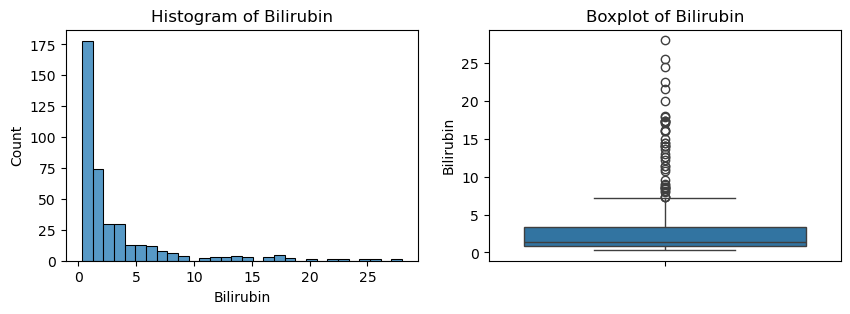

Skewness of Bilirubin: 2.734220426095142
Kurtosis of Bilirubin: 8.135582066375838


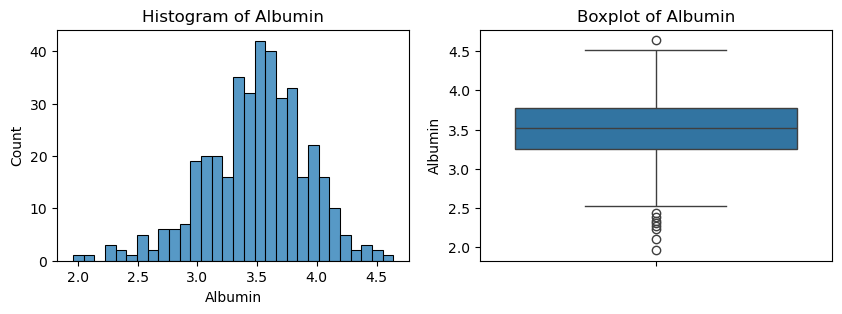

Skewness of Albumin: -0.4490024746316969
Kurtosis of Albumin: 0.6733584179750531


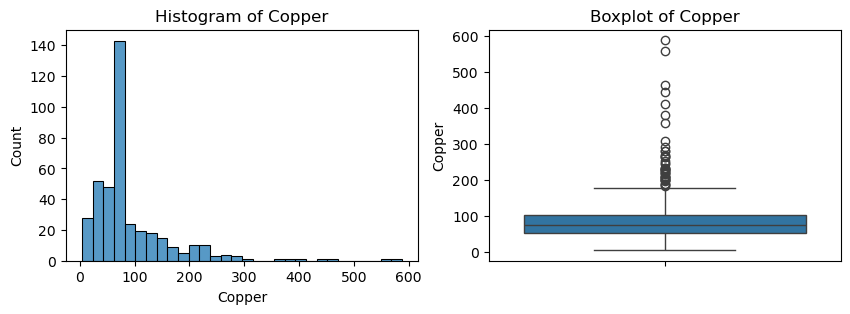

Skewness of Copper: 2.7553896199777976
Kurtosis of Copper: 10.966539138198906


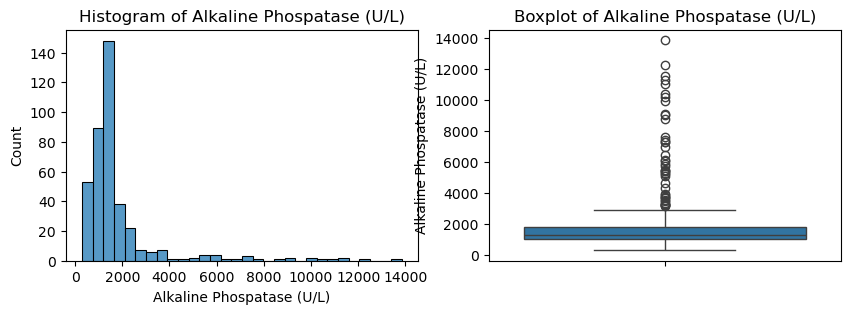

Skewness of Alkaline Phospatase (U/L): 3.549931123581782
Kurtosis of Alkaline Phospatase (U/L): 13.920862283738144


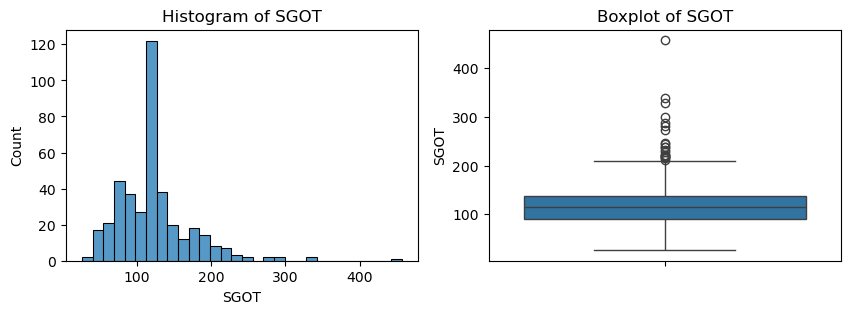

Skewness of SGOT: 1.741224921642759
Kurtosis of SGOT: 6.596897770144622


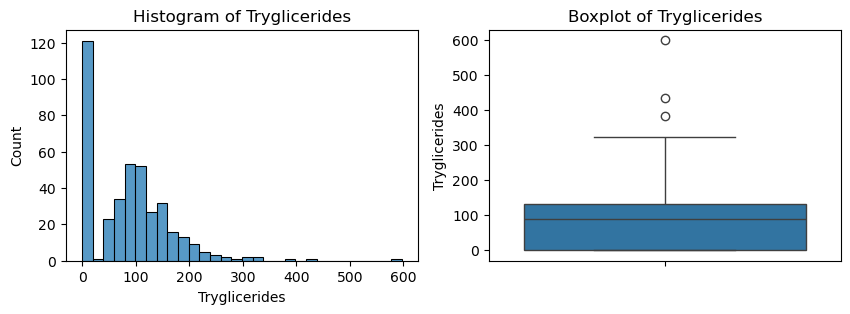

Skewness of Tryglicerides: 1.3271361815568037
Kurtosis of Tryglicerides: 4.749181274251544


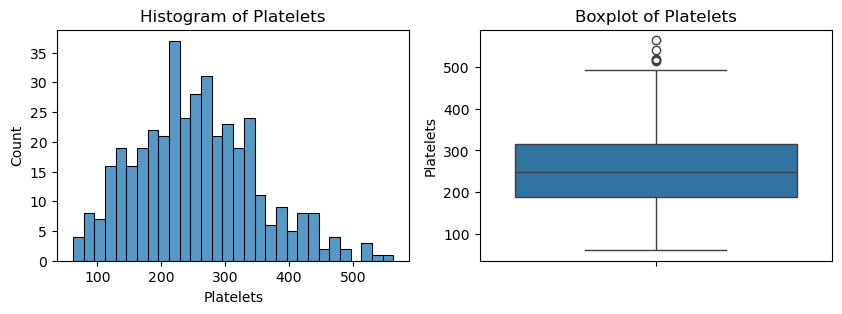

Skewness of Platelets: 0.44758069703889974
Kurtosis of Platelets: 0.0037421016387217954


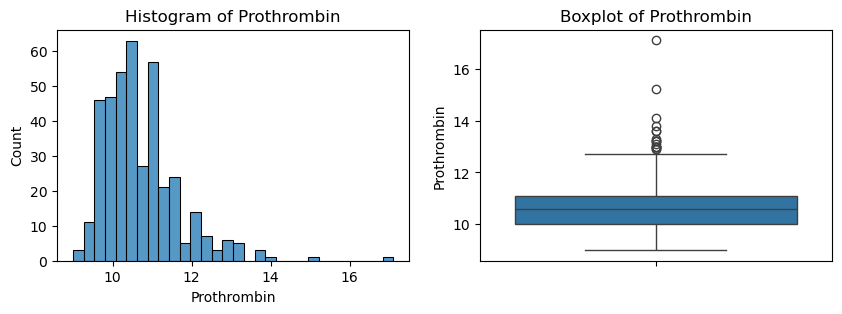

Skewness of Prothrombin: 1.747910788214909
Kurtosis of Prothrombin: 6.099490553711112


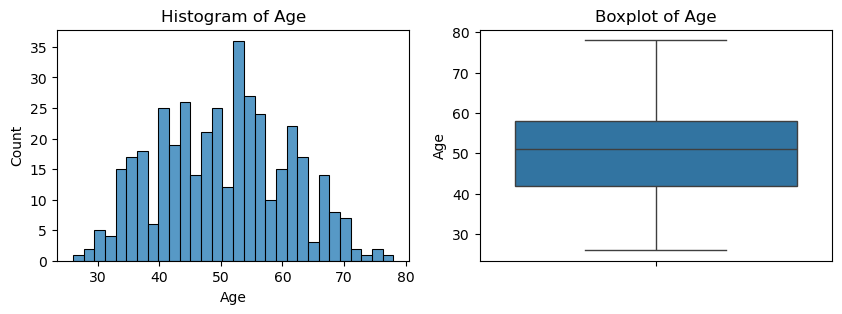

Skewness of Age: 0.09002035462193357
Kurtosis of Age: -0.6514050527341229


In [19]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'Skewness of {col}:', df[col].skew())
        print(f'Kurtosis of {col}:', df[col].kurt())

check_distribution_outliers(datasets, numeric_data)

From the visualization of the numerical data, let's look at each column:
- Normal Distribution vs Non-normal Distribution: We can differentiate between normal and non-normal distributions:
- Normal Distribution: Age, Platelets, and Albumin. Although their values don't exactly match 0 (which indicates normal distribution for skewness), the values close to 0 suggest they are more normally distributed than the others.
Non-normal Distribution: Bilirubin, Copper, Phosphatase, Prothrombin, Triglycerides, and SGOT.
- Outlier Distribution: It can be seen that Bilirubin, Copper, Phosphatase, Prothrombin, Triglycerides, SGOT, Platelets, and Albumin all have a significant percentage of outliers. However, the values still appear to be normal, so we will leave them as they are. Changing these values would remove insights that can be derived from the data later on.

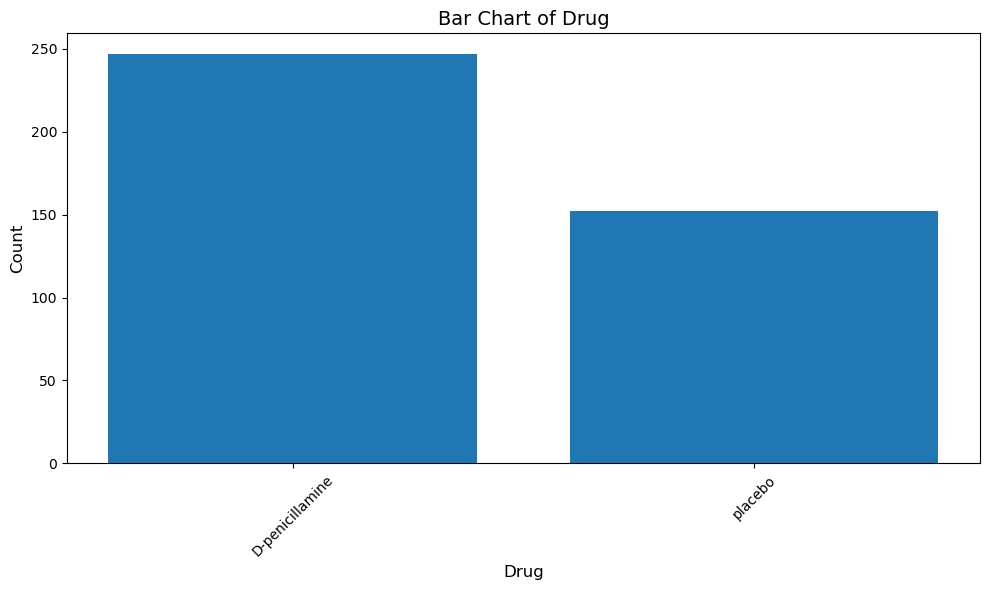

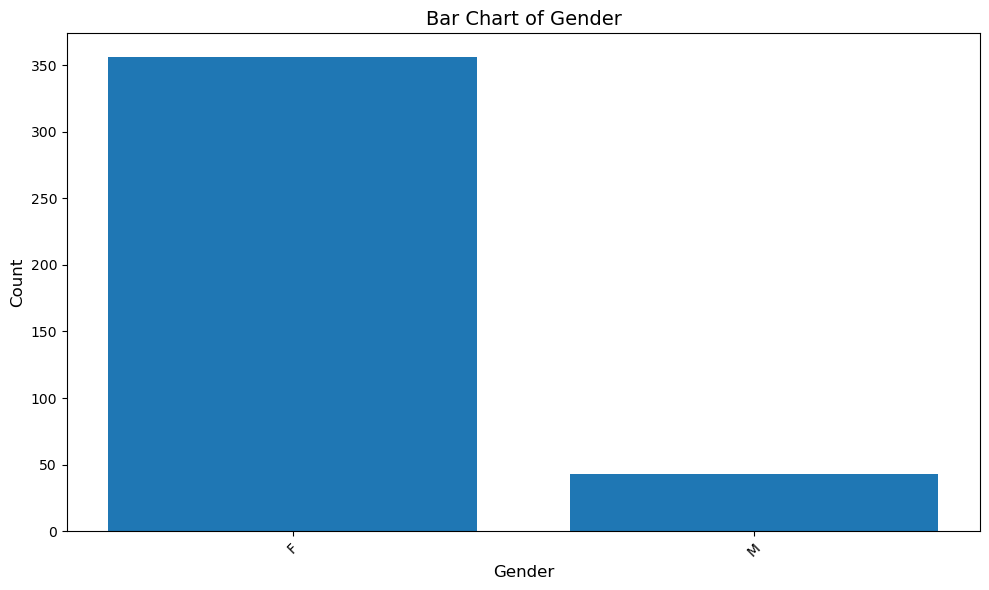

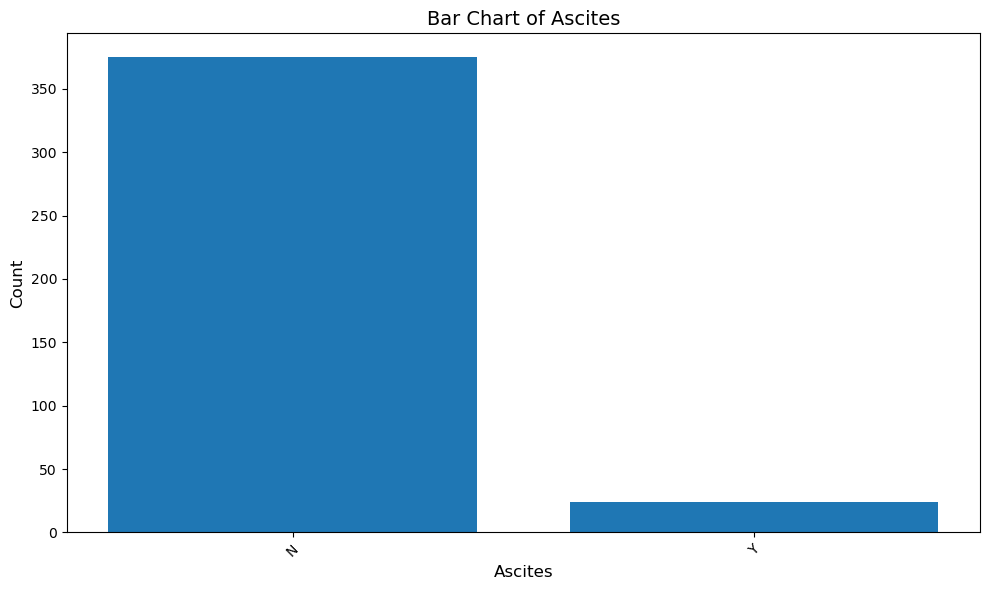

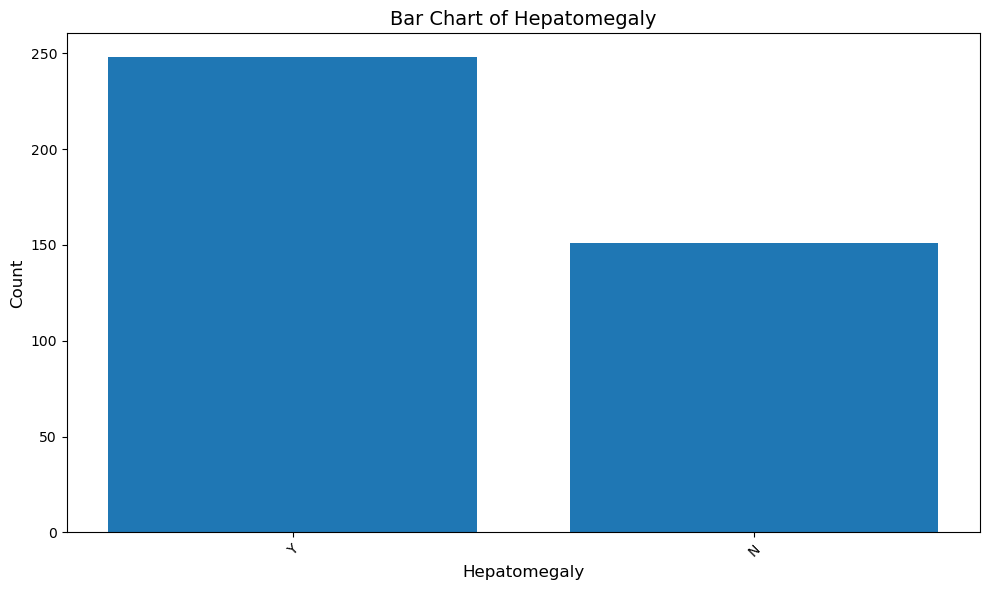

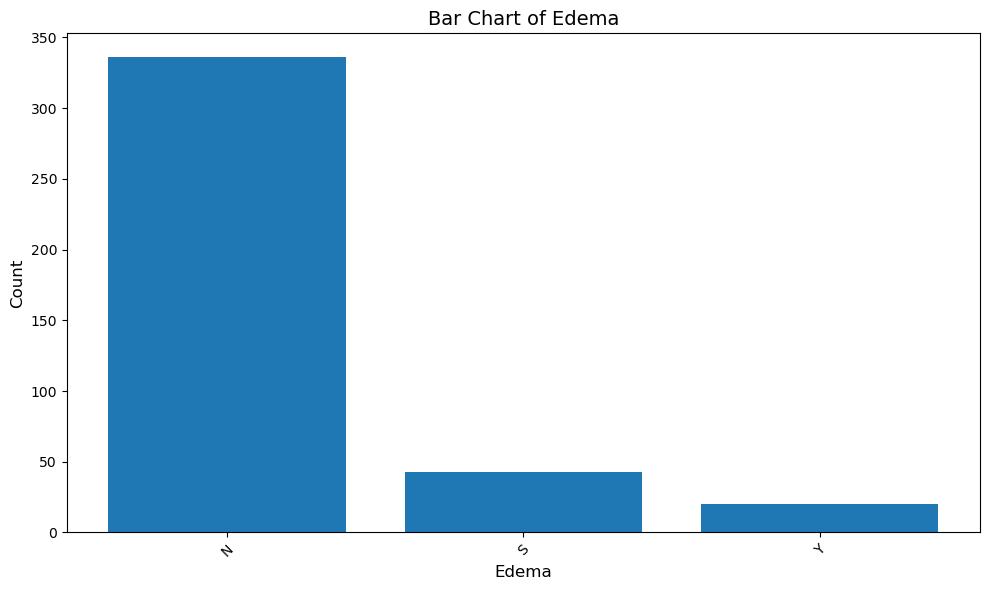

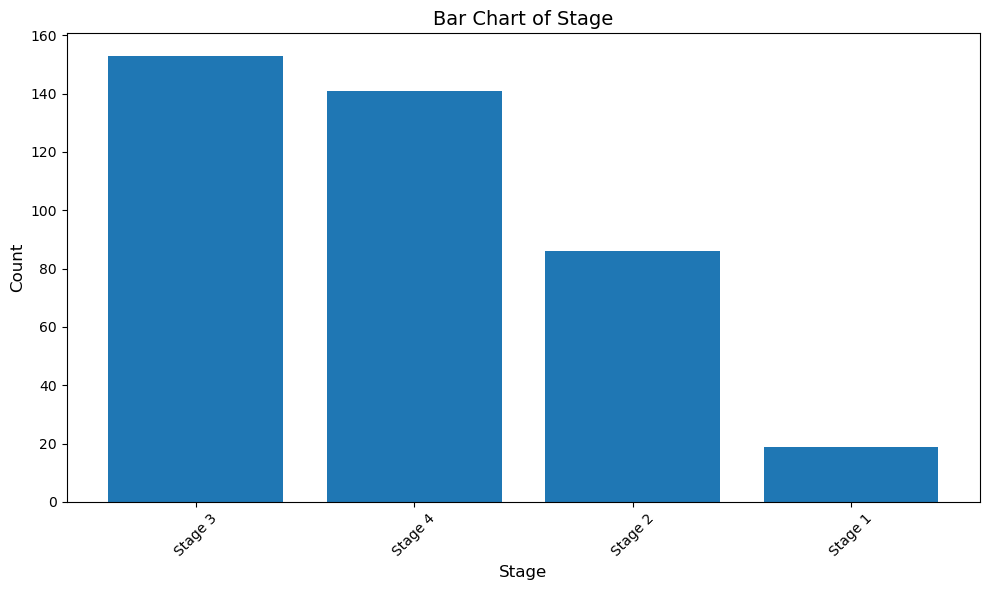

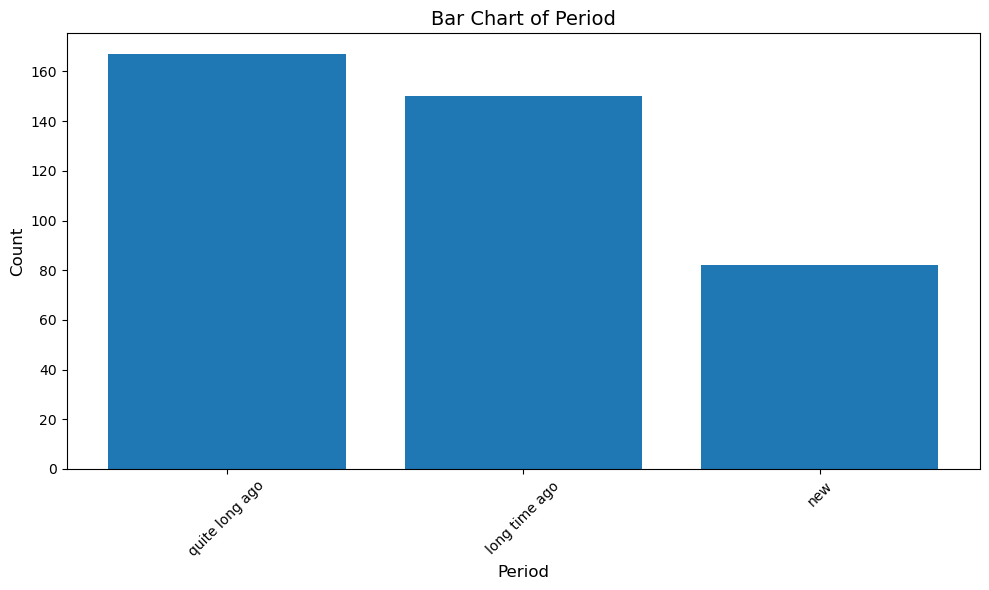

In [17]:
def plot_ordinal(data):
    # Looping per kolom
    for column in data.columns:
        # Menghitung frekuensi dari setiap nilai unik di kolom ordinal
        value_counts = data[column].value_counts().reset_index()
        value_counts.columns = ['value', 'count']

        # Membuat Bar Chart dengan warna berbeda untuk setiap bar menggunakan matplotlib
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts['value'], value_counts['count'])
        plt.title(f'Bar Chart of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Menampilkan grafik
        plt.show()
plot_ordinal(categorical_data)

**h. analysis for each class**

For the class analysis, we will follow the target variable (Y), since we know that the goal of this dataset is to predict whether a person has cirrhosis and at which stage they are. Therefore, we will look at the data visualizations per stage: Stage 1, Stage 2, Stage 3, and Stage 4.

In [20]:
classes = datasets.groupby('Stage')
classes_datasets = {segment: data.drop('Stage', axis=1) for segment, data in classes}
classes_datasets

{'Stage 1':                 Drug Gender Ascites Hepatomegaly Edema  Bilirubin  Albumin  \
 51   D-penicillamine      M       N            N     N        6.0     3.70   
 60           placebo      M       N            N     N        0.6     3.94   
 64   D-penicillamine      F       N            N     N        1.2     3.60   
 72           placebo      F       N            N     N        0.7     3.60   
 97   D-penicillamine      F       N            N     N        1.0     3.77   
 101  D-penicillamine      F       N            N     N        0.9     3.97   
 106          placebo      F       N            N     N        0.6     4.03   
 149          placebo      F       N            N     N        1.0     3.63   
 152  D-penicillamine      F       N            N     N        0.5     3.85   
 173  D-penicillamine      F       N            N     N        0.5     3.85   
 205  D-penicillamine      F       N            N     N        0.6     4.07   
 217  D-penicillamine      F       N     

In [21]:
stage_1 = classes_datasets['Stage 1']
stage_2 = classes_datasets['Stage 2']
stage_3 = classes_datasets['Stage 3']
stage_4 = classes_datasets['Stage 4']

In [22]:
stage_1.info()
stage_1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 51 to 394
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       19 non-null     object 
 1   Gender                     19 non-null     object 
 2   Ascites                    19 non-null     object 
 3   Hepatomegaly               19 non-null     object 
 4   Edema                      19 non-null     object 
 5   Bilirubin                  19 non-null     float64
 6   Albumin                    19 non-null     float64
 7   Copper                     19 non-null     float64
 8   Alkaline Phospatase (U/L)  19 non-null     float64
 9   SGOT                       19 non-null     float64
 10  Tryglicerides              19 non-null     float64
 11  Platelets                  19 non-null     float64
 12  Prothrombin                19 non-null     float64
 13  Age                        19 non-null     int64  
 14 

,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.426316,3.728421,64.421053,1381.757895,92.284211,55.578947,285.105263,10.789474,46.736842
std,1.875527,0.300153,43.157741,1397.866860,40.420426,52.277375,81.795745,1.728807,9.993565
min,0.500000,2.930000,10.000000,423.000000,49.600000,-1.000000,128.000000,9.600000,29.000000
25%,0.600000,3.560000,28.500000,655.500000,59.225000,-1.000000,241.500000,9.950000,38.000000
50%,0.800000,3.770000,68.000000,897.000000,79.050000,68.000000,270.000000,10.100000,49.000000
75%,1.150000,3.955000,73.500000,1259.000000,114.700000,84.500000,323.000000,11.000000,54.000000
max,7.300000,4.190000,172.000000,5300.000000,206.400000,188.000000,430.000000,17.100000,62.000000


In [23]:
stage_2.info()
stage_2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 8 to 399
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       86 non-null     object 
 1   Gender                     86 non-null     object 
 2   Ascites                    86 non-null     object 
 3   Hepatomegaly               86 non-null     object 
 4   Edema                      86 non-null     object 
 5   Bilirubin                  86 non-null     float64
 6   Albumin                    86 non-null     float64
 7   Copper                     86 non-null     float64
 8   Alkaline Phospatase (U/L)  86 non-null     float64
 9   SGOT                       86 non-null     float64
 10  Tryglicerides              86 non-null     float64
 11  Platelets                  86 non-null     float64
 12  Prothrombin                86 non-null     float64
 13  Age                        86 non-null     int64  
 14  

,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.404651,3.610000,69.523256,1698.497674,115.570116,79.244186,286.895349,10.422093,49.360465
std,4.161162,0.382358,47.011570,1900.826059,55.241573,70.114517,101.354942,0.697120,9.857709
min,0.300000,2.640000,4.000000,377.000000,26.350000,-1.000000,70.000000,9.100000,30.000000
25%,0.600000,3.370000,36.250000,975.250000,85.437500,-1.000000,216.000000,9.900000,42.000000
50%,0.900000,3.615000,73.000000,1259.000000,114.700000,85.000000,277.000000,10.350000,49.000000
75%,2.075000,3.880000,77.500000,1627.250000,126.712500,113.750000,336.750000,10.700000,56.000000
max,25.500000,4.640000,227.000000,13862.400000,457.250000,319.000000,539.000000,13.800000,75.000000


In [24]:
stage_3.info()
stage_3.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 416
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       153 non-null    object 
 1   Gender                     153 non-null    object 
 2   Ascites                    153 non-null    object 
 3   Hepatomegaly               153 non-null    object 
 4   Edema                      153 non-null    object 
 5   Bilirubin                  153 non-null    float64
 6   Albumin                    153 non-null    float64
 7   Copper                     153 non-null    float64
 8   Alkaline Phospatase (U/L)  153 non-null    float64
 9   SGOT                       153 non-null    float64
 10  Tryglicerides              153 non-null    float64
 11  Platelets                  153 non-null    float64
 12  Prothrombin                153 non-null    float64
 13  Age                        153 non-null    int64  
 14 

,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age
count,153.000000,153.000000,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2.851634,3.588039,88.392157,1908.28366,122.767059,94.352941,263.117647,10.470588,48.444444
std,4.215605,0.376590,66.613302,2108.80110,48.464583,76.284308,83.508819,0.764240,10.059618
min,0.300000,2.380000,9.000000,289.00000,28.380000,-1.000000,108.000000,9.000000,26.000000
25%,0.800000,3.370000,52.000000,1031.00000,92.000000,-1.000000,207.000000,9.900000,41.000000
50%,1.300000,3.600000,73.000000,1259.00000,114.700000,94.000000,252.000000,10.400000,49.000000
75%,2.900000,3.810000,94.000000,1689.00000,137.950000,140.000000,318.000000,10.800000,54.000000
max,28.000000,4.520000,444.000000,12258.80000,328.600000,382.000000,518.000000,14.100000,72.000000


In [25]:
stage_4.info()
stage_4.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 417
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       141 non-null    object 
 1   Gender                     141 non-null    object 
 2   Ascites                    141 non-null    object 
 3   Hepatomegaly               141 non-null    object 
 4   Edema                      141 non-null    object 
 5   Bilirubin                  141 non-null    float64
 6   Albumin                    141 non-null    float64
 7   Copper                     141 non-null    float64
 8   Alkaline Phospatase (U/L)  141 non-null    float64
 9   SGOT                       141 non-null    float64
 10  Tryglicerides              141 non-null    float64
 11  Platelets                  141 non-null    float64
 12  Prothrombin                141 non-null    float64
 13  Age                        141 non-null    int64  
 14 

,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,4.398582,3.297163,114.439716,1845.255319,126.912979,86.631206,223.709220,11.150355,53.368794
std,4.832524,0.432842,95.368935,1728.500501,48.199472,89.587580,96.979419,1.002541,10.801066
min,0.500000,1.960000,13.000000,310.000000,43.400000,-1.000000,62.000000,9.500000,29.000000
25%,1.200000,3.070000,67.000000,1105.000000,98.000000,-1.000000,149.000000,10.400000,45.000000
50%,2.500000,3.340000,73.000000,1259.000000,114.700000,87.000000,215.000000,11.000000,54.000000
75%,5.600000,3.570000,138.000000,1833.000000,150.350000,128.000000,286.000000,11.600000,61.000000
max,24.500000,4.520000,588.000000,11046.600000,338.000000,598.000000,563.000000,15.200000,78.000000


- numerical class visualization for each stage

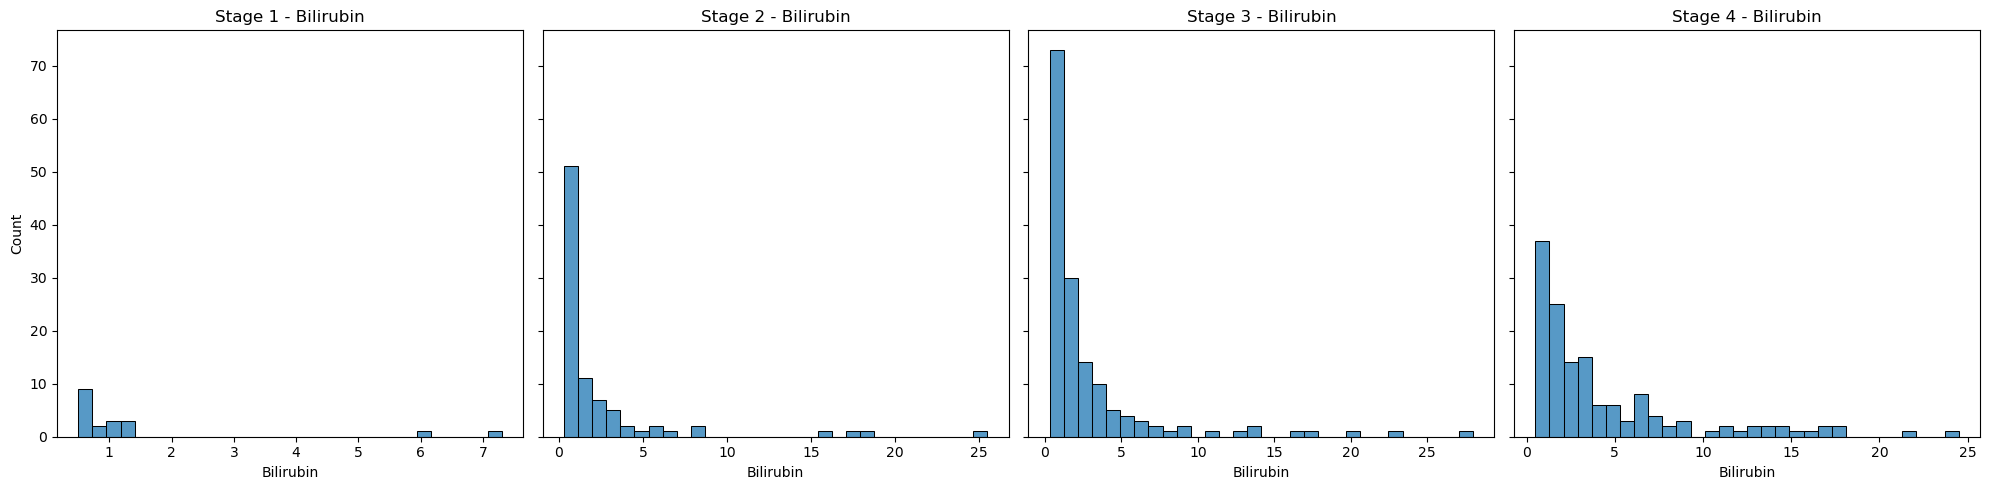

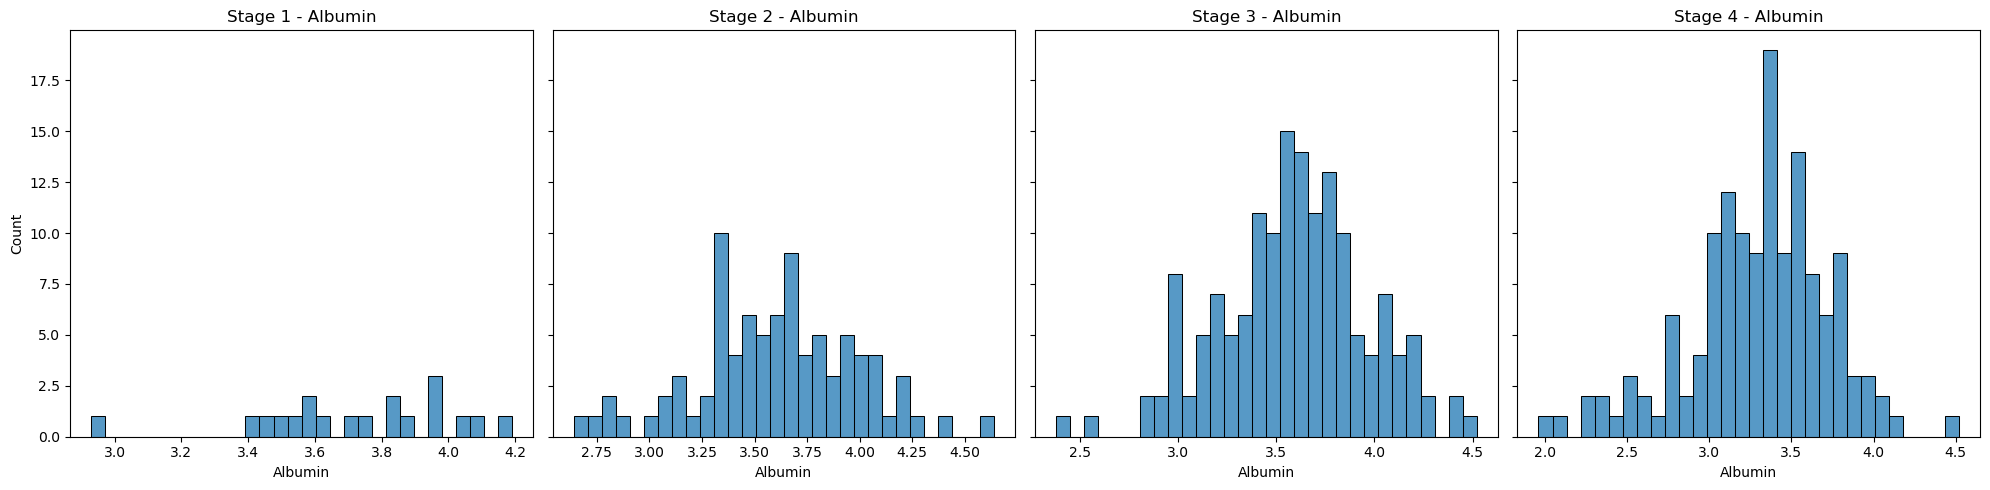

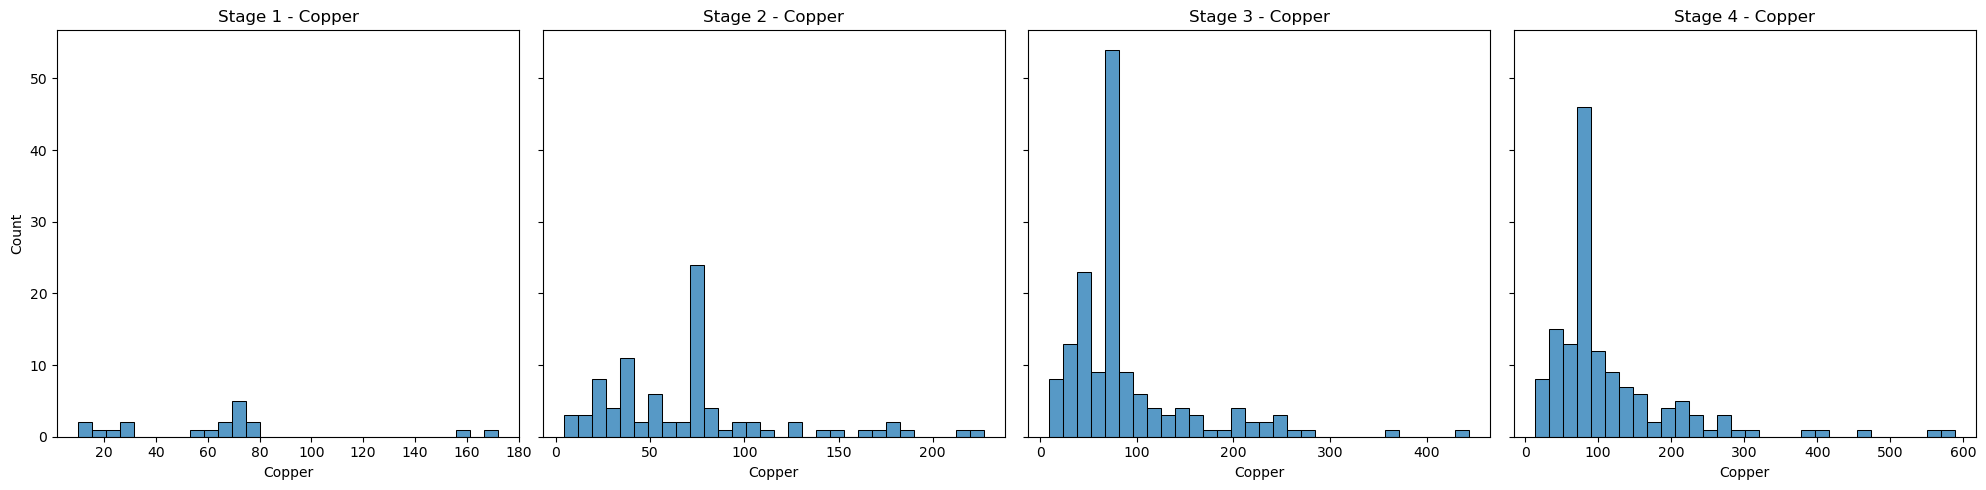

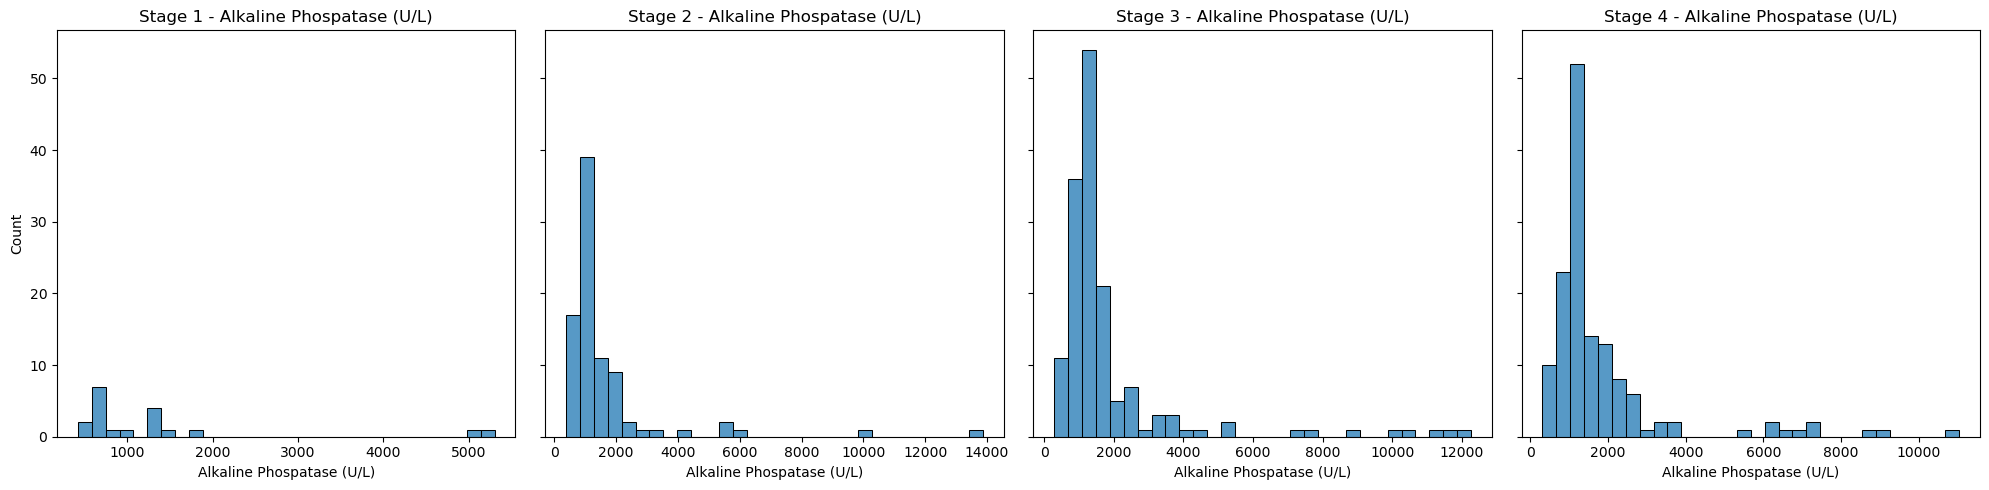

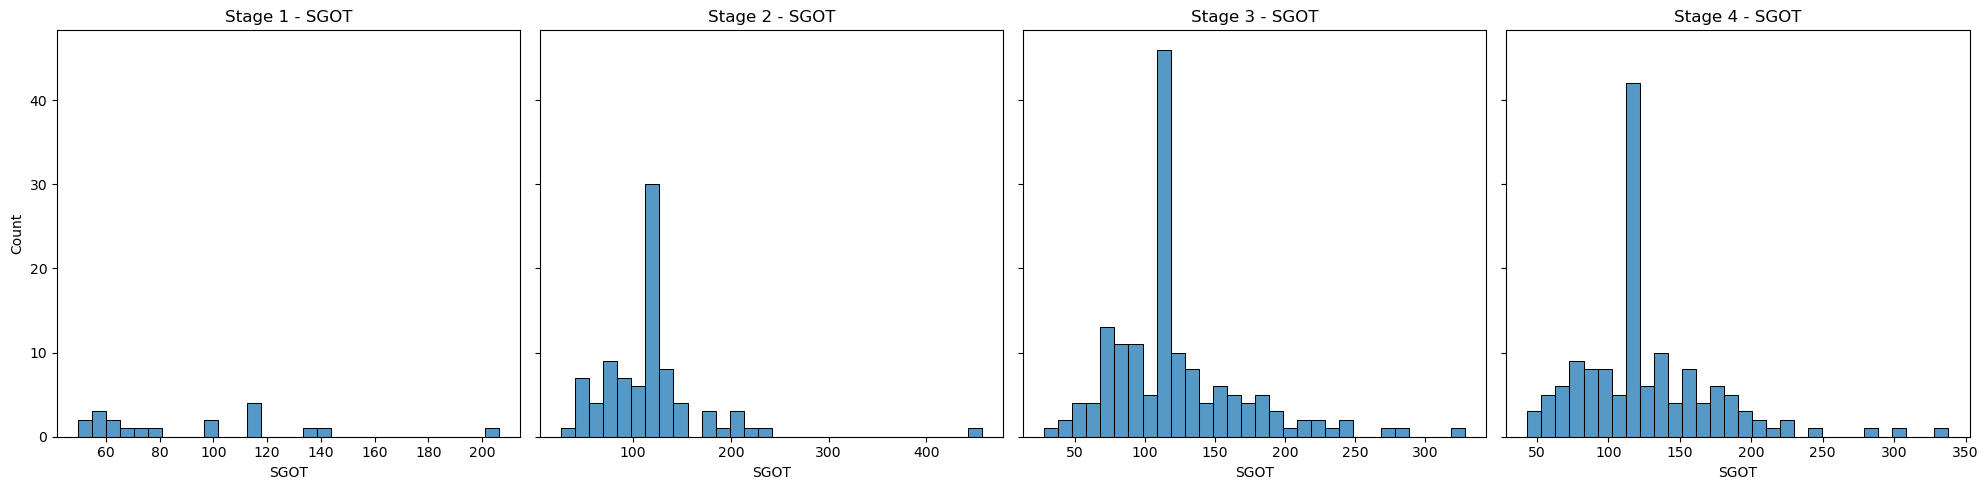

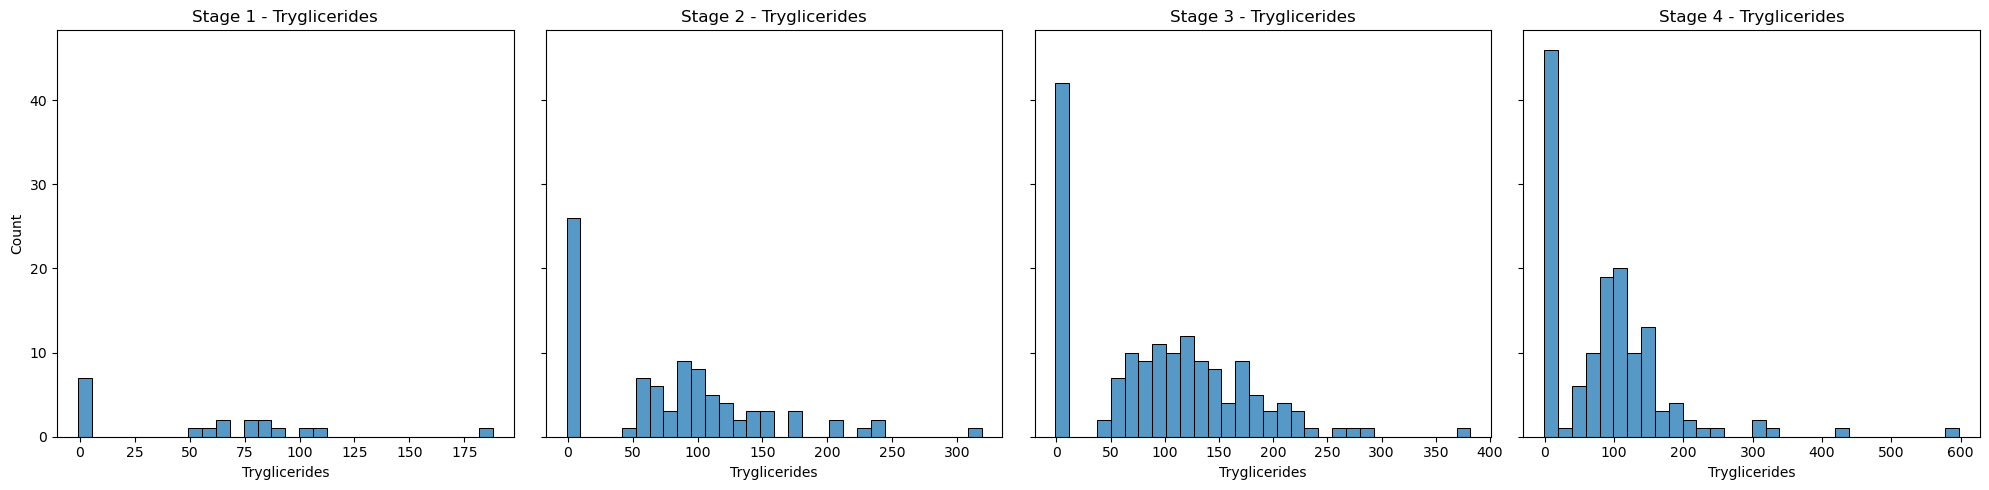

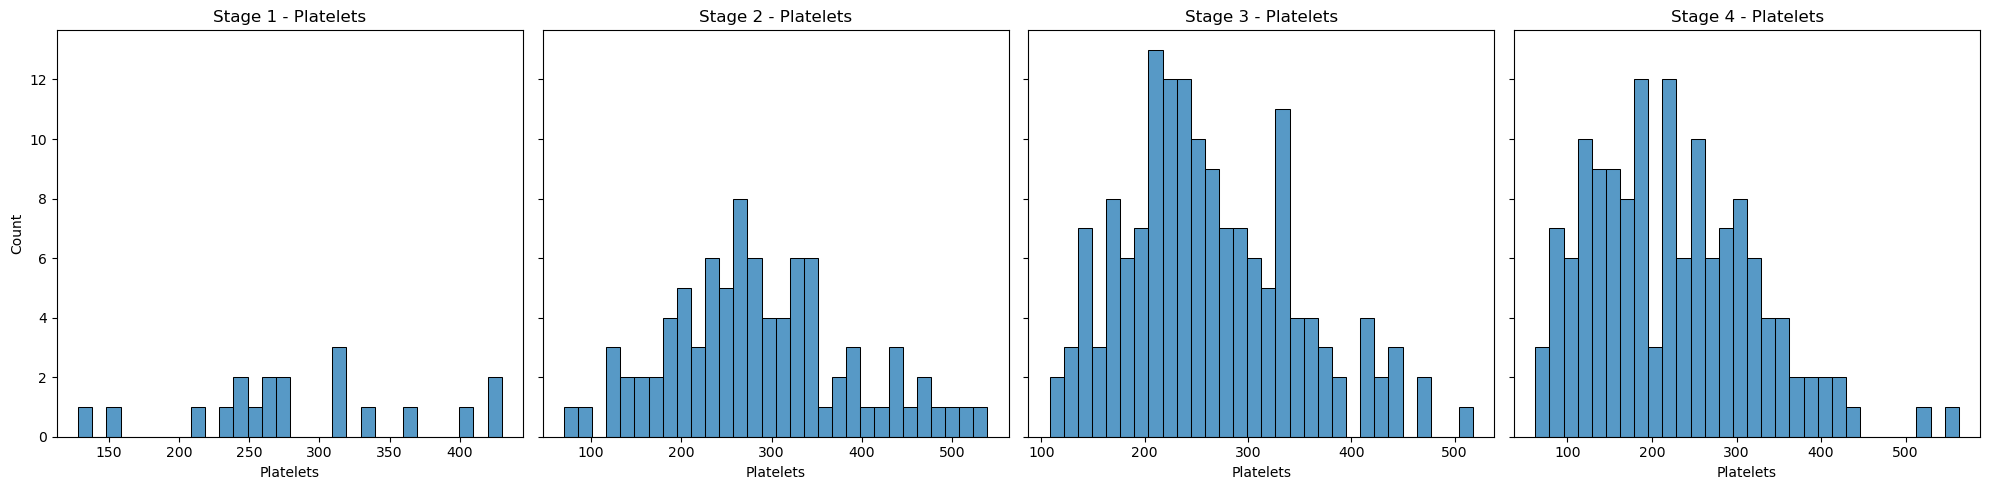

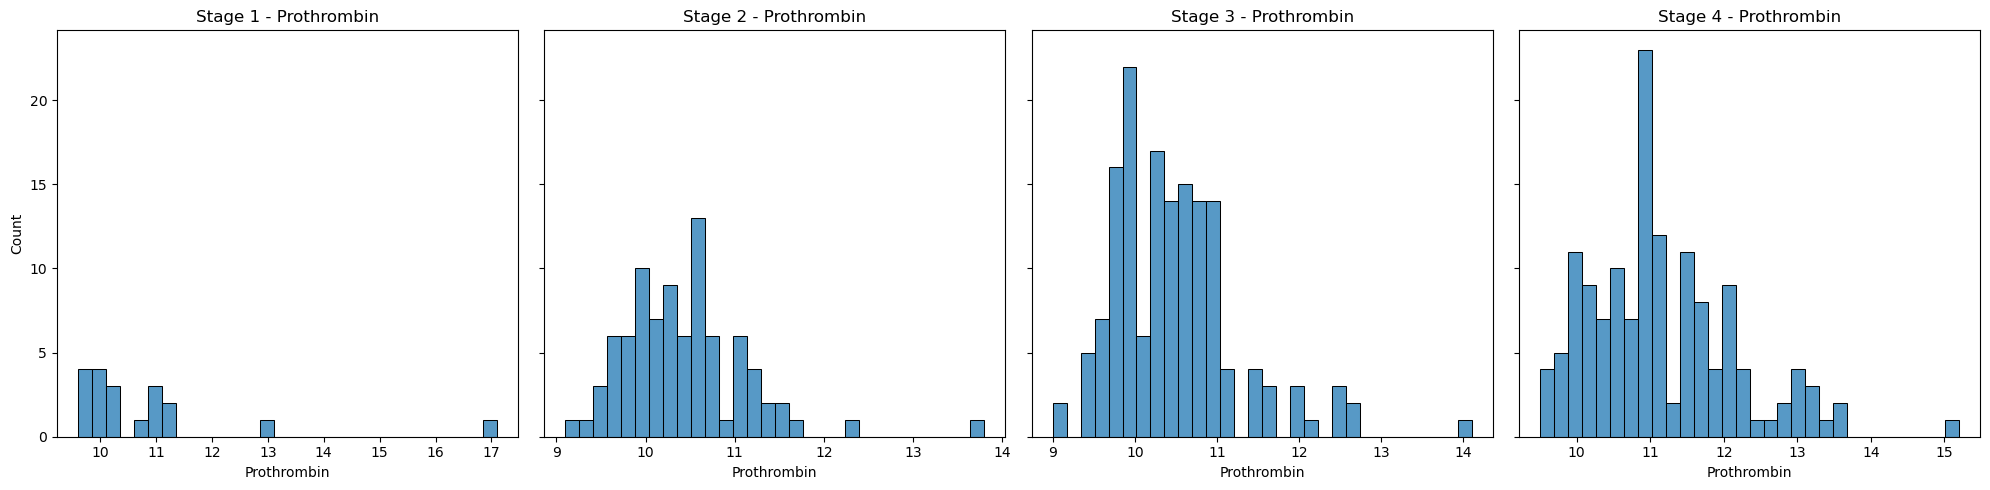

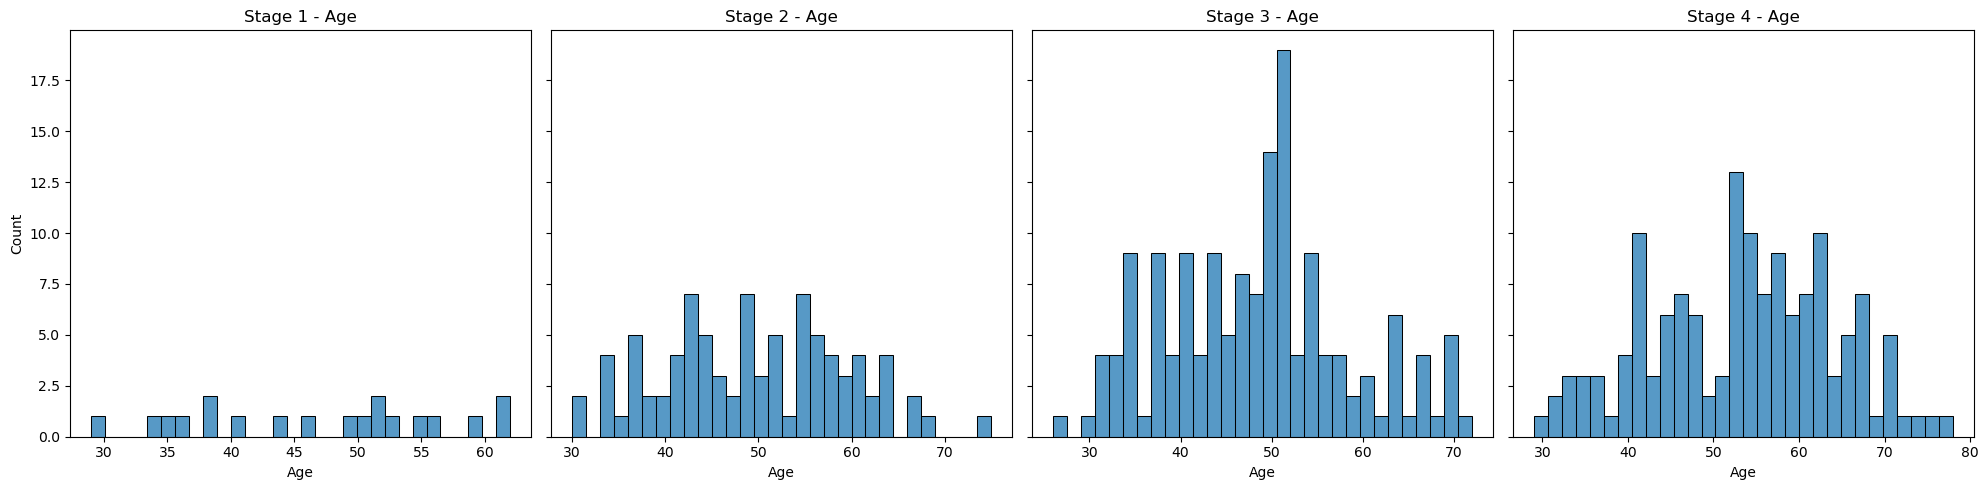

In [26]:
def numerical_distribution(columns):
    for col in columns:
        fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
        segments = [stage_1, stage_2, stage_3, stage_4]
        titles = ["Stage 1", "Stage 2", "Stage 3", "Stage 4"]

        for i, (segment, title) in enumerate(zip(segments, titles)):
            sns.histplot(segment[col], bins=30, ax=axes[i])
            axes[i].set_title(f'{title} - {col}')

        plt.tight_layout()
        plt.show()

# Pretty self-explanatory but the idea is so that I can compare the segments side by side
numerical_distribution(numeric_data)

There are several insights we can gather from the graph above:
- Bilirubin: There is a difference in the distribution of bilirubin across stages.
- Bilirubin is more concentrated at lower values in Stage 1 and becomes more spread out as the stage increases.
- Albumin: The distribution of albumin in Stage 1 is more irregular compared to the other stages. Stages 2 to 4 have distributions more centered around the middle value (3.5). Biologically, low albumin levels are linked to disease indications.
- Copper: Copper has a wider distribution range as the stage increases, with more outliers in Stages 3 and 4.
- Alkaline Phosphatase: The distribution shifts from point 2 in Stages 1 and 2 to point 3 in Stages 3 and 4, indicating an increase in values with stage progression.
- SGOT: We can see that the data is concentrated in the range of 110-120.
- Triglycerides: There doesn't seem to be any significant difference in triglyceride levels across stages 1-4.
- Platelets: There is a noticeable range increase with the stages from 1 to 4.
- Prothrombin: For this variable, we can see a wide range in Stage 1, which narrows as the stage increases.
- Age: Patients tend to be older in the later stages, indicating that the disease progresses with age.

- Categorical class visualization for each stage

In [27]:
categorical_data.drop(["Stage"], axis="columns", inplace=True)

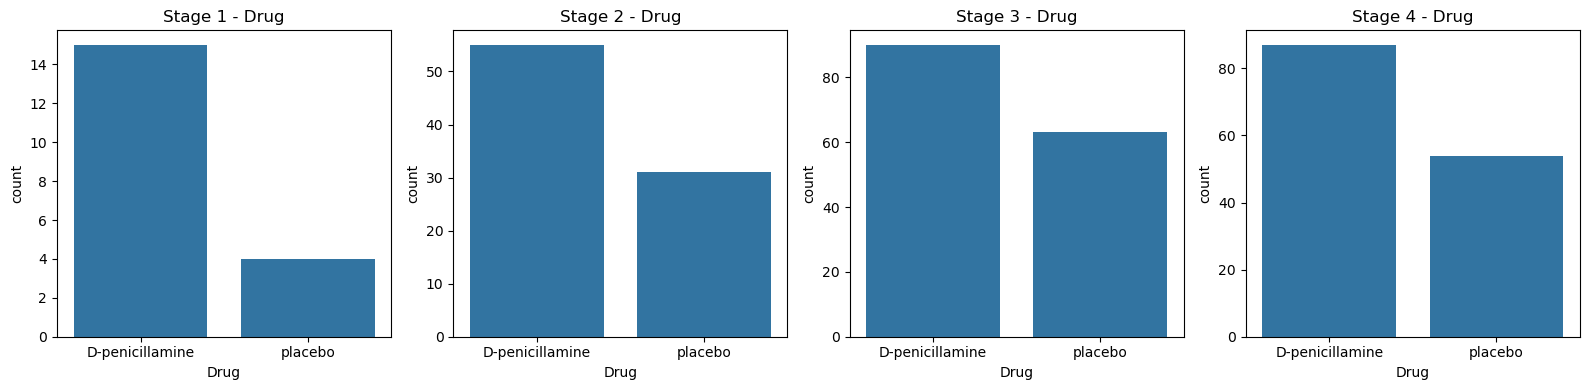

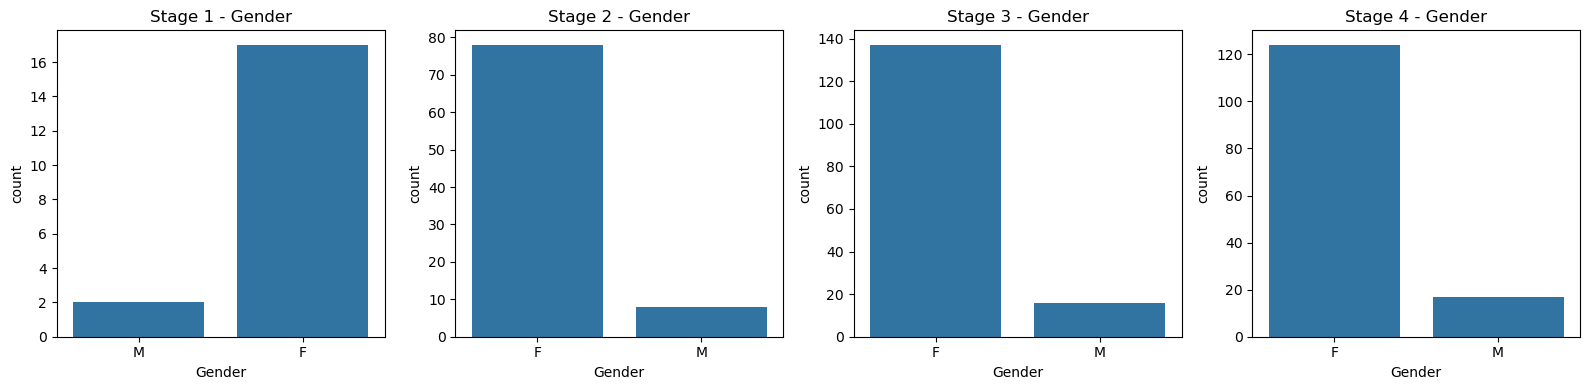

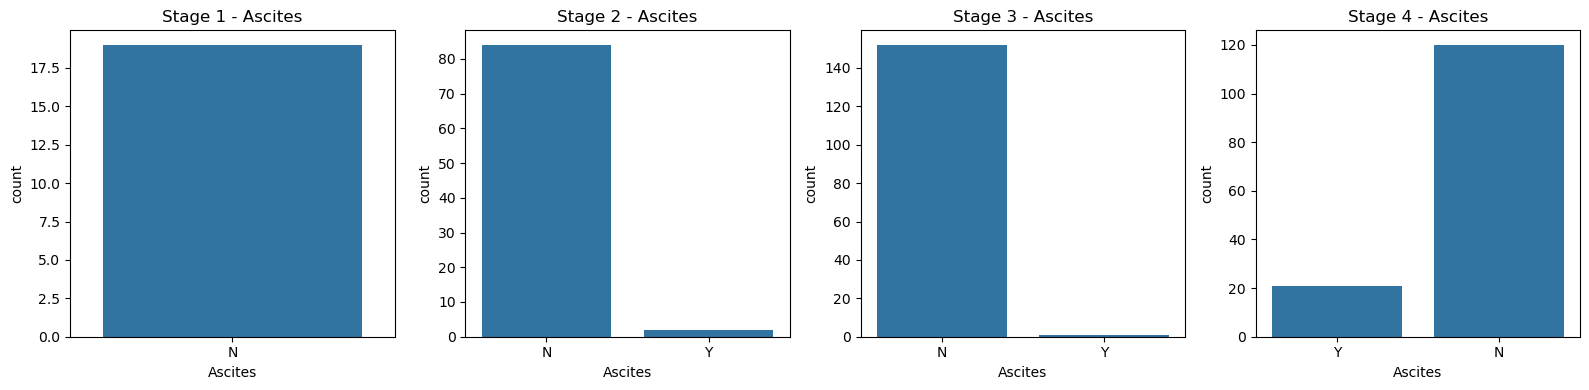

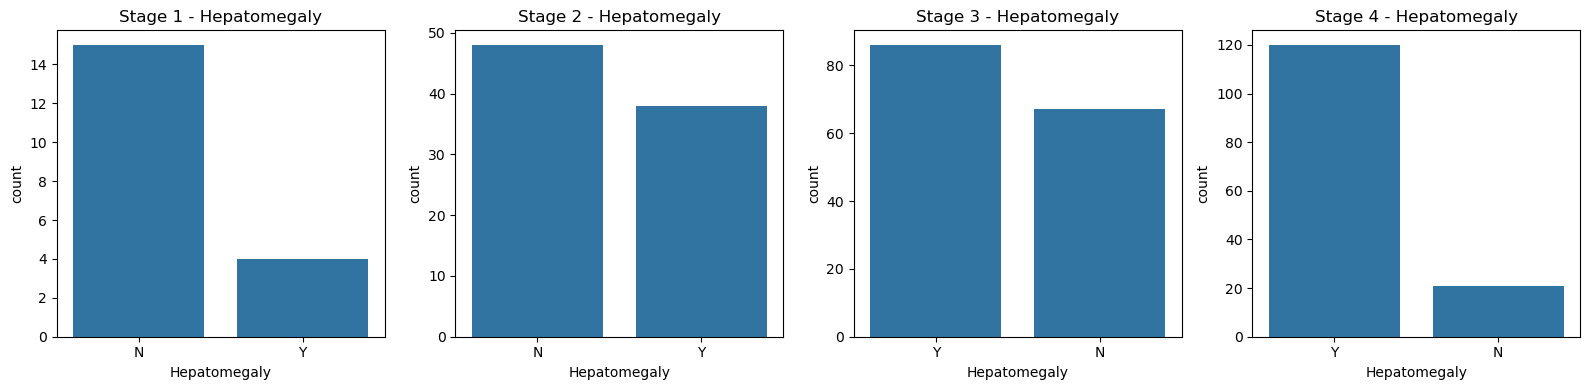

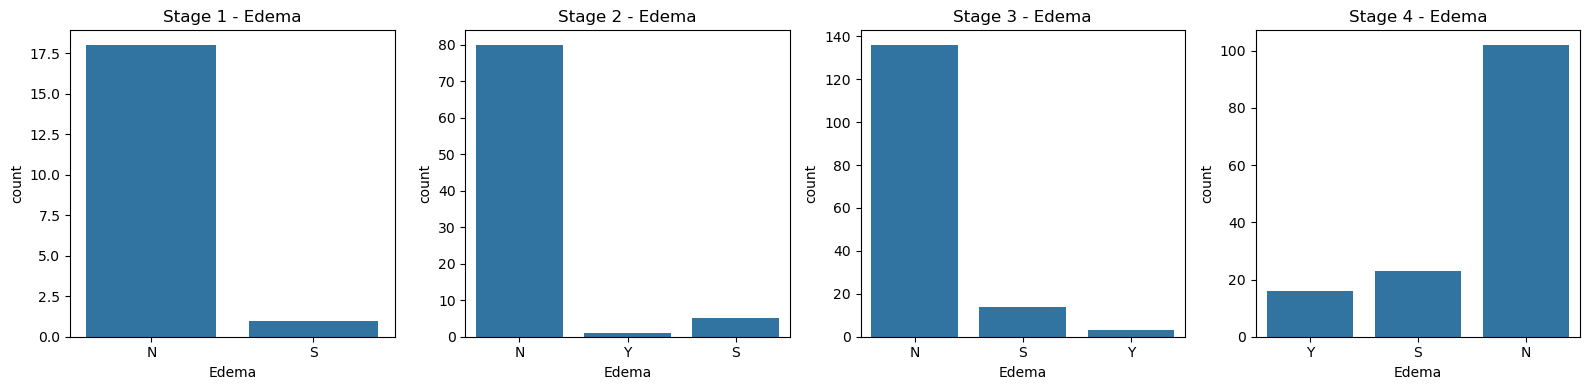

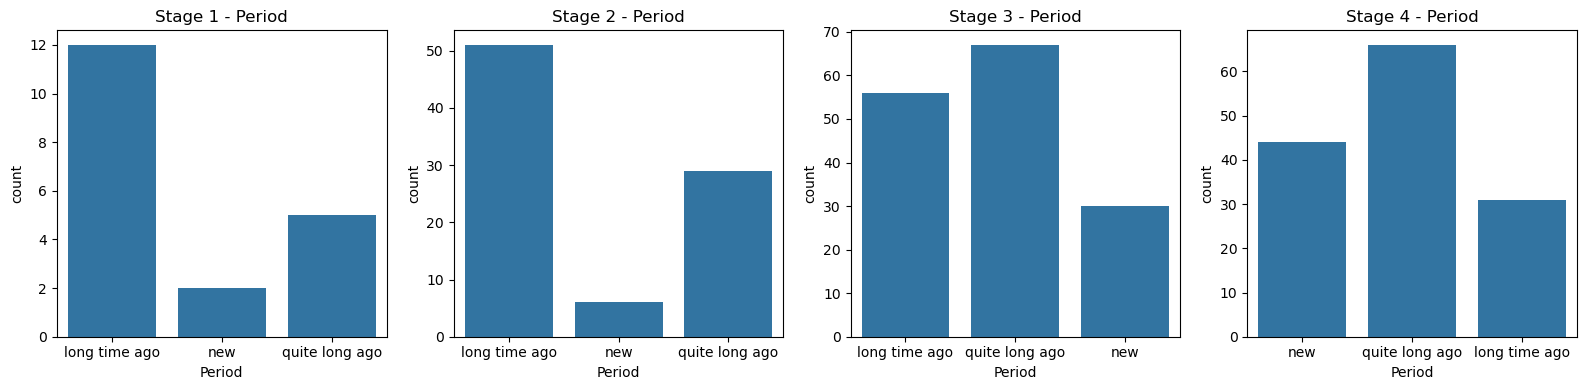

In [28]:
def categorical_distribution(columns):
    stages = [stage_1, stage_2, stage_3, stage_4]
    stage_titles = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']
    
    for col in columns:
        if all(col in stage.columns for stage in stages):
            plt.figure(figsize=(16, 4))
            
            for i, (stage, title) in enumerate(zip(stages, stage_titles)):
                plt.subplot(1, 4, i + 1)
                sns.countplot(data=stage, x=col)
                plt.title(f'{title} - {col}')
            
            plt.tight_layout()
            plt.show()


categorical_distribution(categorical_data)

Let's look at the insights here:
- Drug: From this column, it can be seen that the drug used is more significant for D-penicillamine compared to placebo. However, the use of placebo increases from Stage 1 to Stage 2 and 3, then decreases from Stage 3 to Stage 4. This indicates that D-penicillamine is more likely to be effective for this disease in the later stages.
- Gender: It can be seen that for Stage 1, 2, 3, and 4, cirrhosis is more common in females than in males.
- Ascites: Straight to the point, cirrhosis does not cause ascites in stages 1-4. This is evident from the percentage of people affected by the disease, as not many have ascites.
- Hepatomegaly: Unlike Ascites, hepatomegaly is seen more frequently with cirrhosis. For Stage 1 and 2, it may not have much impact on the appearance of hepatomegaly, but for Stage 3 and 4, it becomes more dominant.
- Edema: Similar to ascites, edema is neither caused by nor causes cirrhosis.
- Period: An interesting insight from the period column is that people who newly registered suddenly show up in Stage 4. This suggests that the time since registration doesn't necessarily affect whether they are at Stage 1 or Stage 4.

**i Spearman correlation**

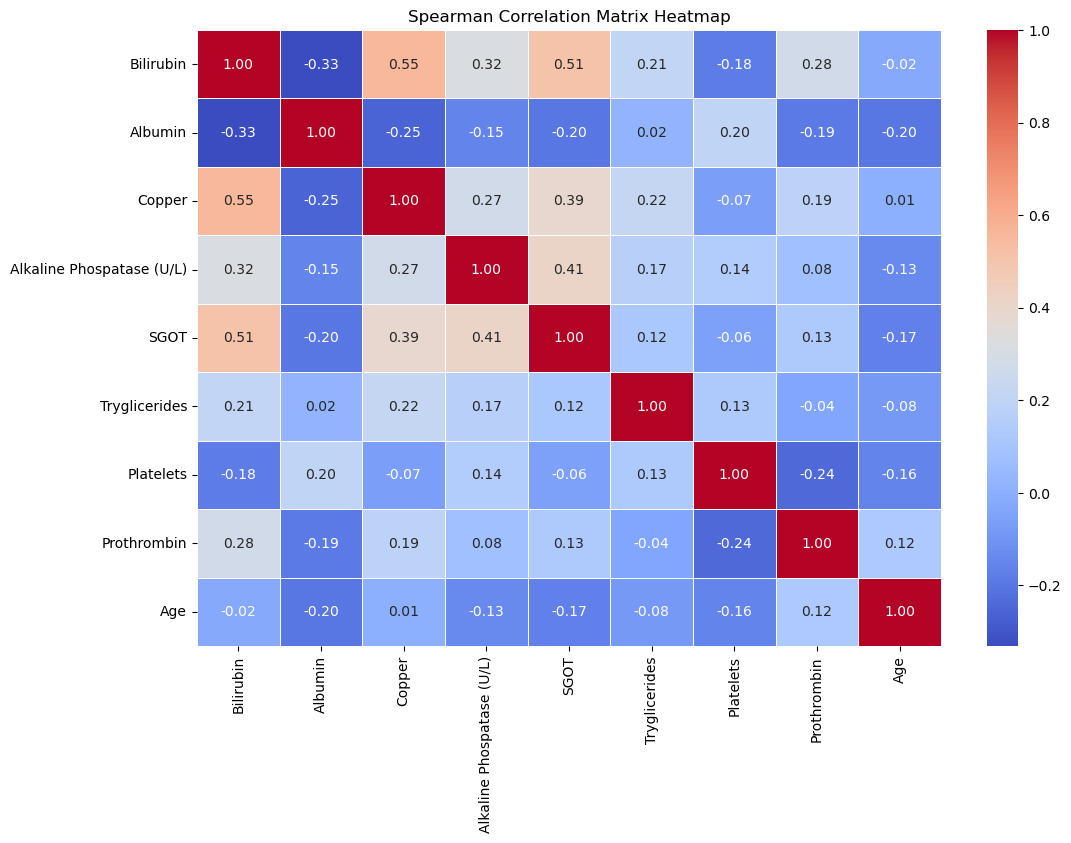

In [27]:
spearman_corr = numeric_data.corr(method='spearman')
plt.figure(figsize=(12, 8))
# memvisualisasikan spearman ke mapnya dengan seaborn
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

It can be observed that albumin and bilirubin have a significant relationship or correlation with copper and SGOT. Therefore, let's perform a VIF (Variance Inflation Factor) test to ensure that there is no multicollinearity, which could negatively impact the training and testing of our model later on.


In [28]:
multicolinearity_table = pd.DataFrame()

multicolinearity_table["Variable Name"] = numeric_data.columns

multicolinearity_table["Colinearity %"] = [variance_inflation_factor(numeric_data.values,i)
    for i in range(len(numeric_data.columns))]

multicolinearity_table

,Variable Name,Colinearity %
0,Bilirubin,2.388329
1,Albumin,53.049889
2,Copper,3.330098
3,Alkaline Phospatase (U/L),2.133302
4,SGOT,8.197812
5,Tryglicerides,2.650178
6,Platelets,8.747683
7,Prothrombin,76.276548
8,Age,23.457693


Actually, Prothrombin has the highest VIF. For now, we’ll keep it during preprocessing because we can't yet judge whether it's good or bad for our model later on.

### Step 3 : Preprocessing Data

First step split both test and train datasets

In [29]:
x = datasets[datasets.columns.drop(['Stage'])]
y = datasets['Stage']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [30]:
x_train_numeric_data = x_train.select_dtypes(include=[np.number])
x_train_categorical_data = x_train.select_dtypes(exclude=[np.number])

x_test_numeric_data = x_test.select_dtypes(include=[np.number])
x_test_categorical_data = x_test.select_dtypes(exclude=[np.number])

a. Numerical

For numerical features, we'll apply:
Standard Scaler for age, since it follows a normal distribution and has no significant outliers.
Robust Scaler for all other numerical features to mitigate the impact of drastic outliers.

In [31]:
rob_scaler = RobustScaler()
std_scaler = StandardScaler()

x_train['Age'] = std_scaler.fit_transform(x_train[['Age']])  
x_test['Age'] = std_scaler.transform(x_test[['Age']])  

numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns  
numeric_columns = numeric_columns.drop('Age')  

# For the remaining numeric columns, apply RobustScaler
x_train[numeric_columns] = rob_scaler.fit_transform(x_train[numeric_columns])  
x_test[numeric_columns] = rob_scaler.transform(x_test[numeric_columns]) 


b. Categorical

1. Label Encoder for gender, ascites, hepatomegaly, and drug (2 unique values).
2. One Hot Encoder for period (no specific order, just represents time).
3. Ordinal Encoder for stage (ordinal values 1, 2, 3, 4) and edema (N, Y, S indicating different stages).


In [32]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False) 

In [33]:
label_columns = ['Gender', 'Ascites', 'Hepatomegaly', 'Drug']

for col in label_columns:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.transform(x_test[col])

ord_enc = OrdinalEncoder(categories=[['N','S','Y']])
x_train['Edema'] = ord_enc.fit_transform(x_train[['Edema']])
x_test['Edema'] = ord_enc.transform(x_test[['Edema']])

one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_period_encoded = one_hot.fit_transform(x_train[['Period']])
test_period_encoded = one_hot.transform(x_test[['Period']])

train_period_df = pd.DataFrame(train_period_encoded, columns=one_hot.get_feature_names_out(['Period']))
test_period_df = pd.DataFrame(test_period_encoded, columns=one_hot.get_feature_names_out(['Period']))

x_train = pd.concat([x_train.reset_index(drop=True), train_period_df], axis=1).drop(columns=['Period'])
x_test = pd.concat([x_test.reset_index(drop=True), test_period_df], axis=1).drop(columns=['Period'])


x_train, x_test = x_train.align(x_test, join='inner', axis=1)

In [34]:
if isinstance(y_test, pd.Series):
    y_test = y_test.to_frame(name='Stage')

if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame(name='Stage')

In [35]:
ord_enc = OrdinalEncoder(categories=[['Stage 1','Stage 2','Stage 3','Stage 4']])
y_train['Stage'] = ord_enc.fit_transform(y_train[['Stage']])
y_test['Stage'] = ord_enc.transform(y_test[['Stage']])

In [36]:
x_train

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age,Period_long time ago,Period_new,Period_quite long ago
0,0,0,0,1,1.0,0.185185,-1.923077,-0.193548,6.815417,-1.149814,0.030418,-0.525896,-0.3,0.348730,0.0,1.0,0.0
1,1,0,0,1,0.0,1.407407,-0.057692,1.440860,0.925018,0.164806,0.357414,0.581673,2.4,0.922651,0.0,0.0,1.0
2,0,0,0,1,0.0,-0.296296,0.211538,0.000000,0.000000,0.000000,-0.676806,1.402390,-0.4,1.305265,0.0,0.0,1.0
3,0,1,1,1,0.0,2.148148,-0.980769,6.602151,-0.386826,0.922913,0.501901,-1.211155,0.6,2.644413,0.0,0.0,1.0
4,0,0,0,1,0.0,-0.259259,0.288462,1.892473,-0.819902,-1.878788,-0.676806,2.310757,-0.7,0.635691,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0,0,0,1,0.0,2.629630,0.865385,4.451613,-0.409250,-0.527379,1.680608,0.231076,0.4,0.157423,0.0,1.0,0.0
315,1,0,0,0,0.0,-0.296296,0.134615,-0.430108,-0.637701,-0.098884,-0.273764,0.175299,0.0,-0.607804,1.0,0.0,0.0
316,0,0,0,0,0.0,0.333333,0.442308,0.086022,1.767344,-0.482722,0.197719,0.478088,-1.1,-1.181725,0.0,0.0,1.0
317,0,0,0,1,0.0,-0.074074,-0.096154,0.000000,0.000000,0.000000,-0.676806,-0.661355,-0.8,1.305265,1.0,0.0,0.0


In [37]:
x_test

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Age,Period_long time ago,Period_new,Period_quite long ago
0,1,0,0,1,0.0,-0.296296,0.961538,3.311828,-0.926419,-1.318448,-0.235741,-0.661355,-0.7,-1.277378,1.0,0.0,0.0
1,0,0,0,1,0.0,1.148148,1.884615,0.000000,0.000000,0.000000,-0.676806,-1.171315,0.2,-0.799111,0.0,0.0,1.0
2,1,0,0,0,0.0,-0.037037,-0.653846,2.752688,15.416678,-0.902924,0.479087,1.450199,0.0,-0.225190,1.0,0.0,0.0
3,0,0,0,0,0.0,-0.296296,-0.269231,-1.376344,-0.175193,-0.395534,-0.250951,0.852590,-0.4,-0.033884,1.0,0.0,0.0
4,0,0,0,0,0.0,-0.111111,0.307692,-0.860215,-0.001402,-0.329612,-0.676806,0.709163,-0.2,-0.225190,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,1,0.0,0.666667,0.403846,1.032258,-0.172390,-0.099947,0.022814,0.119522,-0.6,-1.086072,0.0,0.0,1.0
76,1,0,0,1,0.0,0.740741,-0.250000,-0.473118,-1.330063,-0.659224,-0.334601,-1.227092,0.9,-1.564339,0.0,1.0,0.0
77,0,0,0,1,0.0,-0.148148,-0.076923,0.000000,0.000000,0.000000,-0.676806,-1.051793,0.3,-0.990418,0.0,0.0,1.0
78,1,0,0,0,0.0,1.259259,1.615385,-0.623656,0.518570,2.603934,-0.091255,-0.589641,-0.2,-0.799111,1.0,0.0,0.0


In [38]:
y_train

,Stage
3,3.0
19,3.0
396,3.0
252,3.0
181,1.0
...,...
73,3.0
108,2.0
274,3.0
366,2.0


In [39]:
y_test

,Stage
202,1.0
368,3.0
34,2.0
212,2.0
95,2.0
...,...
253,2.0
229,3.0
387,3.0
179,2.0


### Step 3: Training The Model

- Random Forest

In [40]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [41]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.6
Confusion Matrix:
[[ 0  1  1  1]
 [ 0  5  4  5]
 [ 0  8 19  7]
 [ 0  0  5 24]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.36      0.36      0.36        14
         2.0       0.66      0.56      0.60        34
         3.0       0.65      0.83      0.73        29

    accuracy                           0.60        80
   macro avg       0.42      0.44      0.42        80
weighted avg       0.58      0.60      0.58        80



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- XGB

In [42]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(x_train, y_train)

xg_pred = xgb_model.predict(x_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
xg_accuracy = accuracy_score(y_test, xg_pred)
print(f"XGBOOST Accuracy: {xg_accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, xg_pred))

print("Classification Report:")
print(classification_report(y_test, xg_pred))

XGBOOST Accuracy: 0.4875
Confusion Matrix:
[[ 0  1  0  2]
 [ 0  4  5  5]
 [ 1 11 13  9]
 [ 0  1  6 22]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.24      0.29      0.26        14
         2.0       0.54      0.38      0.45        34
         3.0       0.58      0.76      0.66        29

    accuracy                           0.49        80
   macro avg       0.34      0.36      0.34        80
weighted avg       0.48      0.49      0.47        80



# INSIGHTS
Now, let's compare the two models above, Random Forest and XGBoost. In this case, I will focus on recall > precision because it is more dangerous for someone with cirrhosis to be declared healthy (false negative) than for someone without cirrhosis to be incorrectly diagnosed (false positive). Therefore, our main goal is to prioritize recall.

From the results above, we can see that the recall for both models is relatively low in the macro average (0.44 and 0.36). This low value could indicate issues like imbalanced data or an unsuitable model choice. Let's break it down in more detail:

- Random Forest: From the classes, we can see that the recall for Random Forest increases from Stage 1 to Stage 2, 3, and 4. Initially, the recall was very low but increased to 36, then 56, and finally 83. This indicates that the model is better at identifying people with cirrhosis in stages 2, 3, and 4. The low recall in Stage 1 could be due to the limited data in Stage 1, making it difficult for the model to detect individuals who are truly infected at that stage. Nonetheless, Random Forest performs significantly better in recall than XGBoost.
- XGBoost: For the XGBoost model, we can see that the recall is quite low, especially considering that we are focusing on recall. Unfortunately, the recall is even lower than expected. Moreover, XGBoost also lags behind Random Forest in terms of precision and F1 score. Therefore, for now, we conclude that Random Forest is the better model to use for this case.


### GRID SEARCH FOR BETTER PARAMETERS

- Fine Tuning Random Forest

In [45]:
parameters = {
    'criterion': ('gini', 'entropy'),
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]
}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, 
                              cv=3, scoring='recall_macro', n_jobs=-1, verbose=1)
rf_grid_search.fit(x_train, y_train)
print("Best Random Forest Parameters (Based on Macro Recall):", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(x_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Best Random Forest Parameters (Based on Macro Recall): {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.21      0.21      0.21        14
         2.0       0.61      0.56      0.58        34
         3.0       0.69      0.83      0.75        29

    accuracy                           0.57        80
   macro avg       0.38      0.40      0.39        80
weighted avg       0.55      0.57      0.56        80



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 6, 8, 10],
    'n_estimators': [100, 200, 300, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, 
                                       n_iter=20, cv=3, scoring='recall_macro', n_jobs=-1, verbose=1, random_state=42)

xgb_random_search.fit(x_train, y_train)

print("Best XGBoost Parameters (Based on Macro Recall):", xgb_random_search.best_params_)

xgb_best_model = xgb_random_search.best_estimator_

xgb_predictions = xgb_best_model.predict(x_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best XGBoost Parameters (Based on Macro Recall): {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.29      0.29      0.29        14
         2.0       0.57      0.50      0.53        34
         3.0       0.64      0.79      0.71        29

    accuracy                           0.55        80
   macro avg       0.37      0.39      0.38        80
weighted avg       0.52      0.55      0.53        80



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


sekarang mari kita analisa dengan 3 evaluation metric yang ada

### EVALUATION WITH 3 EVALUATION METRICS

- classification report

random forest

In [74]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.21      0.21      0.21        14
         2.0       0.61      0.56      0.58        34
         3.0       0.69      0.83      0.75        29

    accuracy                           0.57        80
   macro avg       0.38      0.40      0.39        80
weighted avg       0.55      0.57      0.56        80



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBOOST

In [ ]:
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.29      0.29      0.29        14
         2.0       0.57      0.50      0.53        34
         3.0       0.64      0.79      0.71        29

    accuracy                           0.55        80
   macro avg       0.37      0.39      0.38        80
weighted avg       0.52      0.55      0.53        80



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# After 3 hours of Grid Search:
It can be observed that instead of improving, the Random Forest model actually experienced a decline in macro recall. This could be caused by some variables having imbalanced data. However, if we look at XGBoost, it actually saw an improvement, reaching 0.39 for recall, while Random Forest dropped to 0.40. Even though this happened, Random Forest is still the better model for this case. In addition to the higher recall, its precision and F1 score also slightly increased after the grid search. But when compared to the performance before the grid search, it actually performed much better initially.

Ultimately, I believe the issue stems from imbalanced data and potentially incorrect parameters (I’ve tried adjusting them multiple times), but the highest result I could get was 0.40. So, for now, I have decided to conclude the grid search with the conclusion that Random Forest is still the better model to use in this case compared to XGBoost.

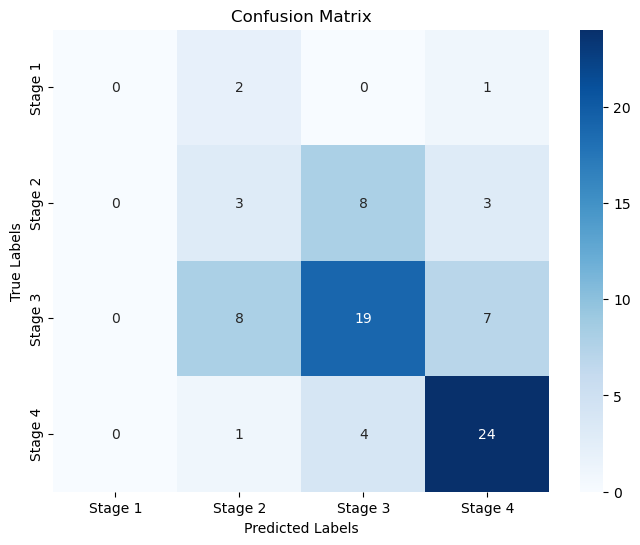

In [78]:
rf_predictions = rf_best_model.predict(x_test)
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stage 1', 'Stage 2','Stage 3','Stage 4'], yticklabels=['Stage 1', 'Stage 2','Stage 3','Stage 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

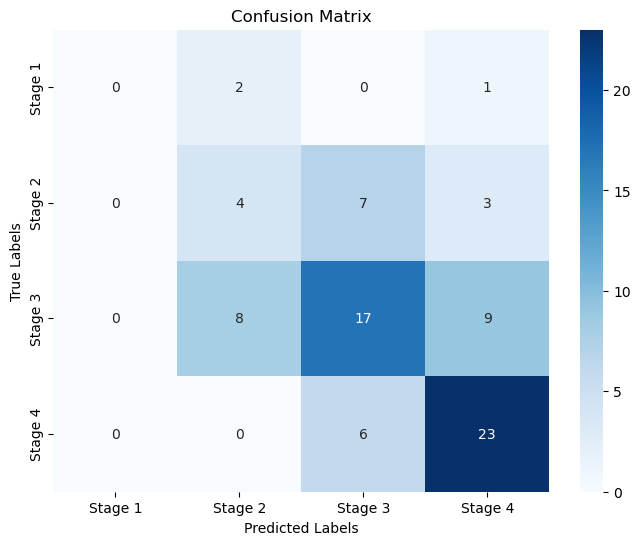

In [79]:
xgb_predictions = xgb_best_model.predict(x_test)
cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stage 1', 'Stage 2','Stage 3','Stage 4'], yticklabels=['Stage 1', 'Stage 2','Stage 3','Stage 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Honestly, when it comes to the confusion matrix, the difference between Random Forest and XGBoost isn’t much—it's like 11/12. If we look closely at Stage 1, both models fail to identify patients with Stage 1 disease, misclassifying them as Stage 2, 3, or even 4. While this is a downside, it can still be forgiven as long as the patient is receiving intensive care.

Then, if we observe Random Forest, it performs very well as the stage of the disease increases, especially in Stages 2, 3, and 4, with Random Forest (3,19,24) compared to XGBoost (4,17,23). Overall, Random Forest is still the better model, but it’s important to acknowledge that XGBoost performs better than Random Forest in Stage 2 predictions.

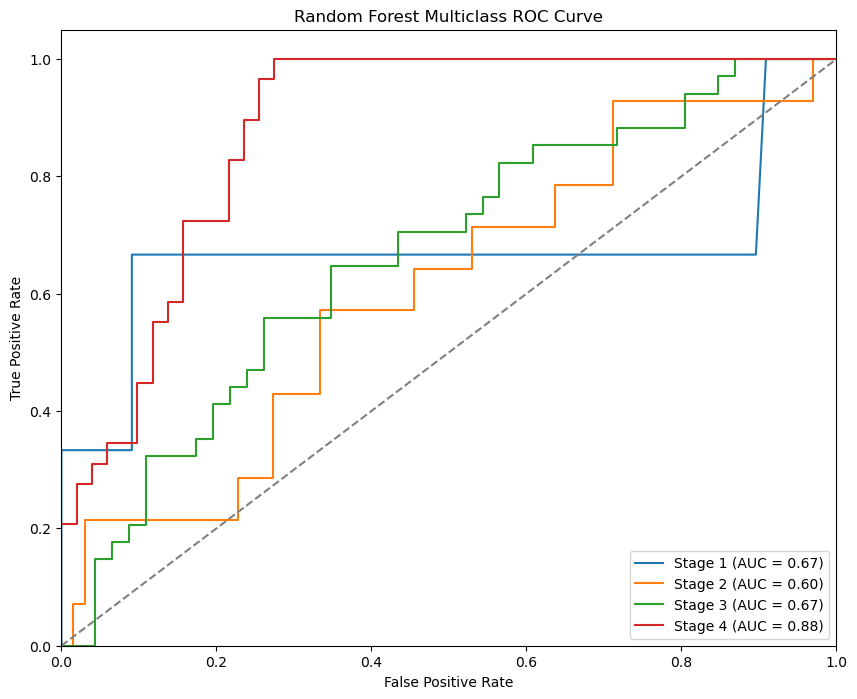

In [85]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  
y_score = rf_best_model.predict_proba(x_test)  

plt.figure(figsize=(10, 8))

for i in range(4):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Stage {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

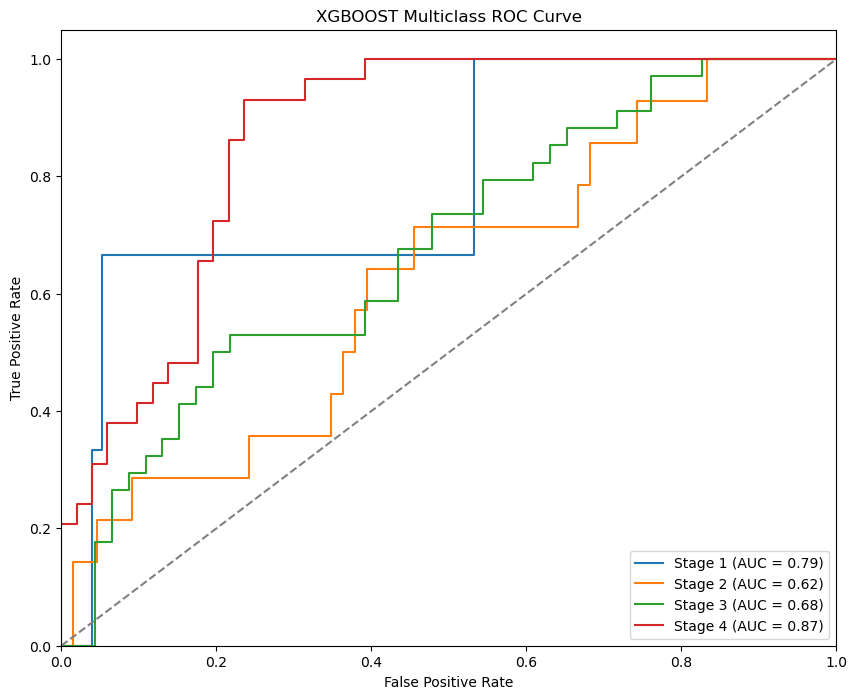

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3]) 
y_score = xgb_best_model.predict_proba(x_test) 
plt.figure(figsize=(10, 8))

for i in range(4):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Stage {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBOOST Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

Based on the comparison of the ROC Multiclass graphs, XGBoost shows superior and more consistent performance compared to Random Forest. For Stage 1, 2, and 3, XGBoost has a higher AUC value (0.79, 0.62, 0.68) compared to Random Forest (0.67, 0.60, 0.67). However, for Stage 4, both models are nearly equal with AUC values of 0.87 (XGBoost) and 0.88 (Random Forest). Overall, the average AUC of XGBoost (0.74) is better than Random Forest (0.705) for this evaluation matrix.

That being said, it’s important to also acknowledge that Random Forest achieves the highest performance with an AUC of 0.88, which surpasses XGBoost. Therefore, Random Forest wins 2-1 against XGBoost.

- feature importance

In [46]:
rf_model = RandomForestClassifier(random_state=42)

# Melatih model
rf_model.fit(x_train, y_train)

# Mendapatkan feature importance
feature_importance = rf_model.feature_importances_
features = x_train.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Mengurutkan dan menampilkan hasil
imp_df = imp_df.sort_values(by='Importance', ascending=False)
imp_df = imp_df.set_index('Feature')
print(imp_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                           Importance
Feature                              
Prothrombin                  0.123974
Platelets                    0.120034
Albumin                      0.118614
Age                          0.100788
Alkaline Phospatase (U/L)    0.085408
Bilirubin                    0.083162
Copper                       0.082418
Tryglicerides                0.076500
SGOT                         0.073001
Hepatomegaly                 0.028780
Period_long time ago         0.024114
Period_quite long ago        0.020136
Period_new                   0.016092
Drug                         0.015782
Edema                        0.015312
Gender                       0.008608
Ascites                      0.007278


### Final Evaluation

Overall Summary for no 1:
1. EDA (Exploratory Data Analysis):
The EDA shows that there are still several imbalanced variables in the dataset, such as Phosphatase (U/L). Additionally, the distribution of cirrhosis stages increases progressively from Stage 1 to Stage 4. This pattern is expected because models tend to perform better with more data; hence, stages 3 and 4 are easier for the model to identify due to the larger amount of data available for these stages.
2. Preprocessing:
Preprocessing for this case is relatively straightforward:
For numerical features, Standard Scaler is used for age, as it has a normal distribution and no outliers, while Robust Scaler is applied to the other numerical features to minimize the influence of outliers.
For categorical features, Label Encoder is used for columns with two unique values, Ordinal Encoder is used for stage and edema (since these are ordinal categories), and One Hot Encoder is used for period (calculated as the difference between the registration date and the current year).
3. Training:
Training with both models (Random Forest and XGBoost) helped to identify which model is more suitable for the problem and provided insights on how to improve the project. The primary goal was to maximize macro average recall, which was initially higher for Random Forest (0.8 before grid search). After grid search, this dropped to 0.1, which indicates Random Forest might be overfitting and struggling with imbalanced data. The model doesn't fully capture the patterns in certain stages. Feature importance analysis showed that prothrombin is the most influential feature for predicting cirrhosis stages, with higher prothrombin levels associated with higher stages.
4. Evaluation:
Evaluation was done using three methods:
Classification Report
Confusion Matrix
Multiclass ROC Curve
From these evaluations, Random Forest outperformed XGBoost in the classification report and confusion matrix, while XGBoost performed better in the Multiclass ROC Curve. However, Random Forest remains the better model overall.
Future Works: Some possible future work to improve the project:
Explore additional features related to the timeline or period of cirrhosis development.
Address imbalances in some of the features with techniques like resampling or using class weights.
Apply the best-performing model in real-world applications, particularly in healthcare, to help with early diagnosis of cirrhosis.
In summary, while Random Forest is the more suitable model for this case based on the evaluation, there's still room to enhance the model's performance, especially regarding imbalanced data and its application in practical scenarios.